In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams.update({'font.size':16})
plt.rcParams["figure.figsize"] = (10,6)

# Quantidade de observações de cada UGRHI

A quantidade de observações de cada UGRHI oferece um conhecimento prévio dos dados que serão utilizados nos experimentos predição utilizando as técnicas de aprendizagem de máquina. Visto que, as técnicas AM necessitam de muitas observações para uma predição de qualidade. Abaixo, segue os quantitativos de observações de cada UGRHI, na qual podemos notar que as UGRHI06 e UGRHI10 são as UGRHI que possuem o maior quantitativo de observações.

In [41]:
print("Quantidade de dados por colunas - UGRHI06")
print('Total Coliformes: 1663')
print('Total dbo: 2248')
print('Total fosforo: 2240') 
print('Total nitrogenio: 251') 
print('Total od: 2036')
print('Total ph: 2257')
print('Total solido: 2241')
print('Total temperatura: 2254')
print('Total turbidez: 2218')
print("--------------------------------------------")
print("Quantidade de dados por colunas - UGRHI10")
print('Total Coliformes: 1221')
print('Total dbo: 1426')
print('Total fosforo: 1413') 
print('Total nitrogenio: 52') 
print('Total od: 1421')
print('Total ph: 1431')
print('Total solido: 1435')
print('Total temperatura: 1432')
print('Total turbidez: 1432')

print("--------------------------------------------")
print("Quantidade de dados por colunas - UGRHI02")
print('Total Coliformes: 41')
print('Total dbo: 111')
print('Total fosforo: 112') 
print('Total nitrogenio: 5') 
print('Total od: 112')
print('Total ph: 112')
print('Total solido: 112')
print('Total temperatura: 112')
print('Total turbidez: 112')

print("--------------------------------------------")
print("Quantidade de dados por colunas - UGRHI05")
print('Total Coliformes: 127')
print('Total dbo: 310')
print('Total fosforo: 213') 
print('Total nitrogenio: 2') 
print('Total od: 311')
print('Total ph: 306')
print('Total solido: 243')
print('Total temperatura: 309')
print('Total turbidez: 309')

print("--------------------------------------------")
print("Quantidade de dados por colunas - UGRHI07")
print('Total Coliformes: 30')
print('Total dbo: 72')
print('Total fosforo: 72') 
print('Total nitrogenio: 0') 
print('Total od: 73')
print('Total ph: 72')
print('Total solido: 71')
print('Total temperatura: 73')
print('Total turbidez: 73')


Quantidade de dados por colunas - UGRHI06
Total Coliformes: 1663
Total dbo: 2248
Total fosforo: 2240
Total nitrogenio: 251
Total od: 2036
Total ph: 2257
Total solido: 2241
Total temperatura: 2254
Total turbidez: 2218
--------------------------------------------
Quantidade de dados por colunas - UGRHI10
Total Coliformes: 1221
Total dbo: 1426
Total fosforo: 1413
Total nitrogenio: 52
Total od: 1421
Total ph: 1431
Total solido: 1435
Total temperatura: 1432
Total turbidez: 1432
--------------------------------------------
Quantidade de dados por colunas - UGRHI02
Total Coliformes: 41
Total dbo: 111
Total fosforo: 112
Total nitrogenio: 5
Total od: 112
Total ph: 112
Total solido: 112
Total temperatura: 112
Total turbidez: 112
--------------------------------------------
Quantidade de dados por colunas - UGRHI05
Total Coliformes: 127
Total dbo: 310
Total fosforo: 213
Total nitrogenio: 2
Total od: 311
Total ph: 306
Total solido: 243
Total temperatura: 309
Total turbidez: 309
-------------------

# Pré-processamento UGRHI06

In [42]:
dfp06 = pd.DataFrame() # Refere-se aos dados da UGRHI 06
#dfp10 = pd.DataFrame() # Refere-se aos dados da UGRHI 10

for i in ('ph','coliformes', 'dbo','fosforo','nitrogenio','od','solido','temperatura','turbidez'):
    
    str_files = i
    #Carrega os dados do arquivo .csv
    df = pd.read_csv(str_files + '.CSV',encoding='utf-8',sep=';')
      
    #Seleciona os dados da UGRHI 10 - SOROCABA/MEDIO TIETE e UGRHI 06 - ALTO TIÊTE
    z06 = df.loc[df['UGRHI'] == '06 - ALTO TIÊTE']
    #z10 = df.loc[df['UGRHI'] == '10 - SOROCABA/MEDIO TIETE']
              
    dfp06['dt_coleta_'+i] =  z06['data_coleta']
    dfp06[i]     =  z06['valor']
        
    #dfp10['dt_coleta_'+i] =  z10['data_coleta']
    #dfp10[i]     =  z10['valor']
    
dfp06   

,dt_coleta_ph,ph,dt_coleta_coliformes,coliformes,dt_coleta_dbo,dbo,dt_coleta_fosforo,fosforo,dt_coleta_nitrogenio,nitrogenio,dt_coleta_od,od,dt_coleta_solido,solido,dt_coleta_temperatura,temperatura,dt_coleta_turbidez,turbidez
163,01/01/1978,7.10,05/08/1981,130.0,01/02/1978,5.0,01/02/1978,0.658,13/09/2018,31.50,01/01/1978,0.2,01/01/1978,268.0,01/01/1978,21.0,01/01/1978,150.0
164,01/02/1978,6.60,06/10/1981,330.0,01/03/1978,21.0,01/03/1978,0.581,22/11/2018,23.80,01/05/1978,0.6,01/02/1978,320.0,01/02/1978,23.0,01/02/1978,75.0
165,01/03/1978,6.60,05/11/1981,230000.0,01/04/1978,12.0,01/04/1978,0.364,09/01/2019,8.85,01/06/1978,2.7,01/03/1978,192.0,01/03/1978,26.0,01/03/1978,15.0
166,01/04/1978,6.70,02/12/1981,7900.0,01/05/1978,18.0,01/05/1978,0.454,13/01/2016,7.01,01/07/1978,3.5,01/04/1978,277.0,01/04/1978,24.0,01/04/1978,35.0
167,01/05/1978,7.10,06/01/1982,790.0,01/06/1978,5.0,01/06/1978,0.095,09/03/2016,6.78,01/08/1978,1.4,01/05/1978,335.0,01/05/1978,22.0,01/05/1978,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4173,25/04/2019,7.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03/01/2019,26.4,NaN,NaN
4174,16/05/2019,7.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13/03/2019,25.3,NaN,NaN
4175,06/06/2019,7.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25/04/2019,25.2,NaN,NaN
4176,04/07/2019,7.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16/05/2019,21.6,NaN,NaN


In [43]:
#Mostra a quantidade de NaN no dataframe
for field in dfp06.columns:
    print(field, 'NaN:', dfp06[field].isnull().sum())

dt_coleta_ph NaN: 0
ph NaN: 0
dt_coleta_coliformes NaN: 948
coliformes NaN: 948
dt_coleta_dbo NaN: 61
dbo NaN: 61
dt_coleta_fosforo NaN: 214
fosforo NaN: 214
dt_coleta_nitrogenio NaN: 2136
nitrogenio NaN: 2136
dt_coleta_od NaN: 517
od NaN: 517
dt_coleta_solido NaN: 156
solido NaN: 156
dt_coleta_temperatura NaN: 12
temperatura NaN: 12
dt_coleta_turbidez NaN: 144
turbidez NaN: 144


In [46]:
dfp06.describe().round(2)

,ph,coliformes,dbo,fosforo,nitrogenio,od,solido,temperatura,turbidez
count,2257.00,1.309000e+03,2196.00,2043.00,121.00,1740.00,2101.00,2245.00,2113.00
mean,6.82,2.035906e+06,26.94,1.92,20.11,2.08,284.88,21.80,38.09
std,0.48,8.690742e+06,32.25,44.91,11.74,2.41,203.23,2.91,53.43
min,3.50,0.000000e+00,0.10,0.00,1.54,0.00,1.28,14.00,0.00
25%,6.50,3.600000e+02,4.00,0.10,9.02,0.21,114.00,19.80,9.50
50%,6.90,2.300000e+05,17.00,0.53,20.90,0.82,276.00,22.00,25.00
75%,7.10,1.800000e+06,40.00,1.43,29.60,3.60,388.00,24.00,46.00
max,8.98,2.300000e+08,669.00,2030.00,45.50,18.00,2560.00,32.00,1180.00


In [47]:
'''
- Cria a coluna dt_coleta referente a data da coleta. Foi verificado que os parâmetros que possuem valores foram coletados 
na mesma data.

'''

dfp06['dt_coleta'] = dfp06['dt_coleta_ph']

#Remove as colunas que não serão utilizadas no experimento. Critério: Remoção das datas da coleta e colunas com NaN.
dfp06 = dfp06.drop(['dt_coleta_coliformes', 'dt_coleta_dbo','dt_coleta_fosforo','dt_coleta_nitrogenio','dt_coleta_od','dt_coleta_ph','dt_coleta_solido','dt_coleta_temperatura','dt_coleta_turbidez','nitrogenio'], axis=1)
dfp06

,ph,coliformes,dbo,fosforo,od,solido,temperatura,turbidez,dt_coleta
163,7.10,130.0,5.0,0.658,0.2,268.0,21.0,150.0,01/01/1978
164,6.60,330.0,21.0,0.581,0.6,320.0,23.0,75.0,01/02/1978
165,6.60,230000.0,12.0,0.364,2.7,192.0,26.0,15.0,01/03/1978
166,6.70,7900.0,18.0,0.454,3.5,277.0,24.0,35.0,01/04/1978
167,7.10,790.0,5.0,0.095,1.4,335.0,22.0,50.0,01/05/1978
...,...,...,...,...,...,...,...,...,...
4173,7.41,NaN,NaN,NaN,NaN,NaN,26.4,NaN,25/04/2019
4174,7.43,NaN,NaN,NaN,NaN,NaN,25.3,NaN,16/05/2019
4175,7.58,NaN,NaN,NaN,NaN,NaN,25.2,NaN,06/06/2019
4176,7.17,NaN,NaN,NaN,NaN,NaN,21.6,NaN,04/07/2019


In [48]:
#Cria o index data_coleta
data_coleta = pd.to_datetime(dfp06['dt_coleta'])
data_coleta_index = pd.DatetimeIndex(data_coleta.values)
dfp06=dfp06.set_index(data_coleta_index)
dfp06.drop('dt_coleta',axis=1,inplace=True)

In [49]:
#Mostra a quantidade de NaN no dataframe
for field in dfp06.columns:
    print(field, 'NaN:', dfp06[field].isnull().sum())

ph NaN: 0
coliformes NaN: 948
dbo NaN: 61
fosforo NaN: 214
od NaN: 517
solido NaN: 156
temperatura NaN: 12
turbidez NaN: 144


In [50]:
#Agrupa os dados pela media mensal
df06 = dfp06.resample('M').mean()

In [51]:
df06.describe().round(2)

,ph,coliformes,dbo,fosforo,od,solido,temperatura,turbidez
count,336.00,294.00,329.00,325.00,302.00,316.00,334.00,329.00
mean,6.85,2358582.15,28.64,1.76,1.98,283.46,21.85,35.71
std,0.37,5245794.08,18.75,14.06,1.18,103.48,1.95,22.64
min,5.57,2.00,1.00,0.03,0.00,33.23,16.65,3.00
25%,6.63,520287.75,16.67,0.52,1.12,220.92,20.54,20.25
50%,6.90,1101561.25,26.41,0.87,1.99,290.13,21.82,32.00
75%,7.07,2300000.00,37.00,1.29,2.72,338.70,23.28,44.87
max,8.25,58250209.25,133.67,254.17,6.20,723.33,27.00,157.01


UGRHI06


C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Anderson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.6%

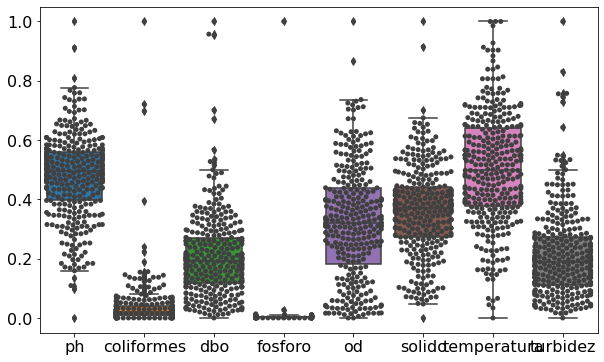

In [52]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
df06_padronizado = sc.fit_transform(df06)

ph          = []
coliformes  = []
dbo         = []
fosforo     = []
od          = []
solido      = []
temperatura = []
turbidez    = []

for i in range(0,8):#coluna
    for j in range(0,len(df06_padronizado)): #linha
        if (i == 0):
            ph.append(df06_padronizado[j][i]) 
        elif (i == 1):
            coliformes.append(df06_padronizado[j][i])
        elif (i == 2):
            dbo.append(df06_padronizado[j][i])
        elif (i == 3):
            fosforo.append(df06_padronizado[j][i])
        elif (i == 4):
            od.append(df06_padronizado[j][i])
        elif (i == 5):
            solido.append(df06_padronizado[j][i])
        elif (i == 6):
            temperatura.append(df06_padronizado[j][i])
        else:
            turbidez.append(df06_padronizado[j][i])

dict = {'ph':ph,'coliformes':coliformes,'dbo':dbo,'fosforo':fosforo,'od':od,'solido':solido,'temperatura':temperatura,'turbidez':turbidez}

df06_pad = pd.DataFrame(dict)
print("UGRHI06")
#ax = sns.violinplot(data=df06_pad,inner="point")
ax = sns.boxplot(data=df06_pad)
ax = sns.swarmplot(data=df06_pad, color=".25")
plt.rcParams["figure.figsize"] = (15,6)



In [53]:
#Mostra a quantidade de NaN no dataframe
for field in df06.columns:
    print(field, 'NaN:', df06[field].isnull().sum())

ph NaN: 167
coliformes NaN: 209
dbo NaN: 174
fosforo NaN: 178
od NaN: 201
solido NaN: 187
temperatura NaN: 169
turbidez NaN: 174


In [54]:
df06 = df06.interpolate()

In [55]:
#Mostra a quantidade de NaN no dataframe
for field in df06.columns:
    print(field, 'NaN:', df06[field].isnull().sum())

ph NaN: 0
coliformes NaN: 0
dbo NaN: 0
fosforo NaN: 0
od NaN: 0
solido NaN: 0
temperatura NaN: 0
turbidez NaN: 0


In [56]:
df06

,ph,coliformes,dbo,fosforo,od,solido,temperatura,turbidez
1978-01-31,6.415254,1.492010e+06,19.932203,0.725203,1.288983,291.305085,21.338983,62.362712
1978-02-28,6.404952,1.587547e+06,19.122792,0.706433,1.355509,290.850631,21.371426,62.670960
1978-03-31,6.393545,1.693320e+06,18.226659,0.685652,1.429162,290.347485,21.407346,63.012236
1978-04-30,6.382507,1.795681e+06,17.359433,0.665542,1.500439,289.860570,21.442106,63.342502
1978-05-31,6.371100,1.901455e+06,16.463299,0.644761,1.574092,289.357425,21.478026,63.683777
...,...,...,...,...,...,...,...,...
2019-07-31,7.340000,8.115310e+05,41.025974,0.318414,0.420000,344.767399,26.850000,32.000000
2019-08-31,7.370000,9.301910e+05,26.129870,0.546829,0.720000,336.690934,25.439754,102.000000
2019-09-30,6.827000,1.045023e+06,11.714286,0.767875,2.256250,328.875000,24.075000,45.714286
2019-10-31,6.920000,1.045023e+06,11.714286,0.767875,2.256250,328.875000,21.140164,45.714286


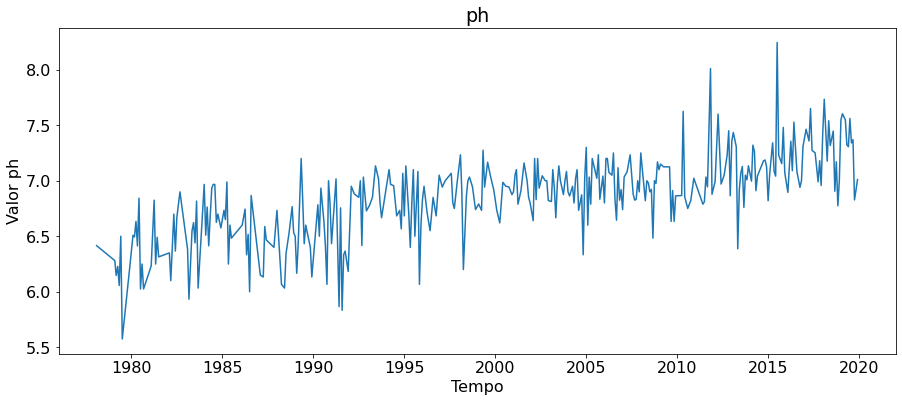

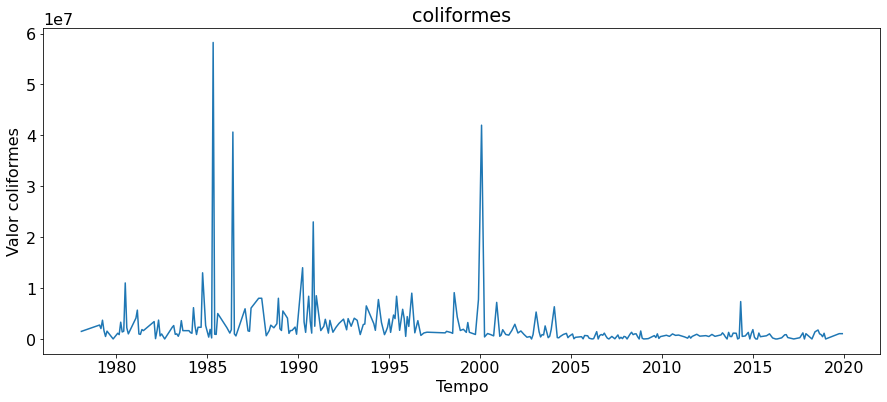

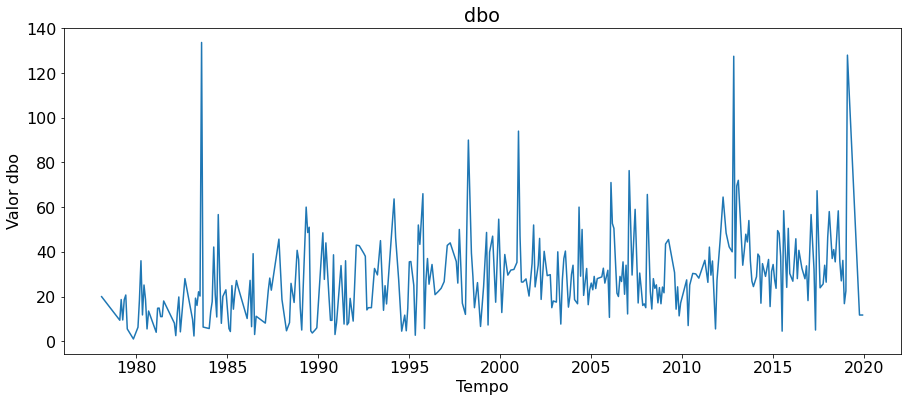

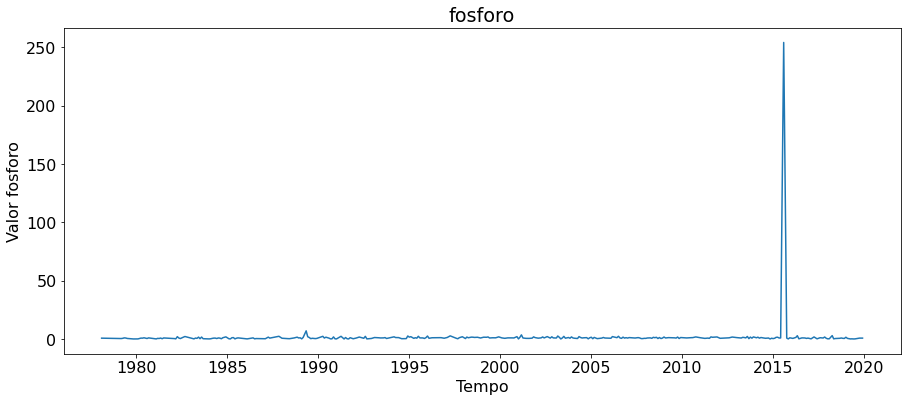

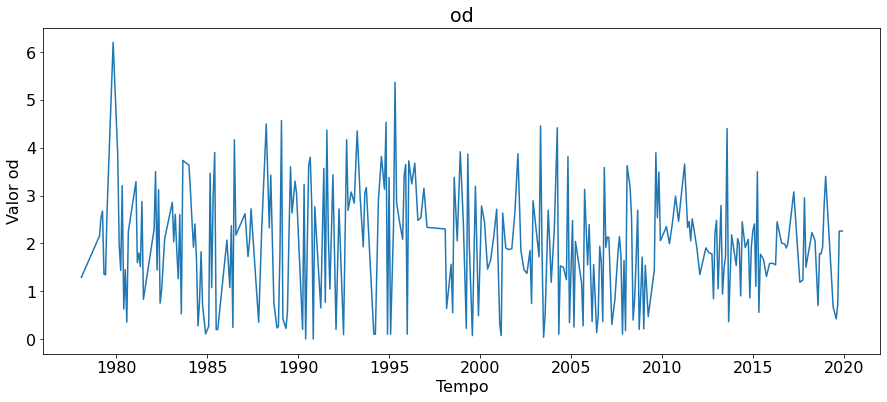

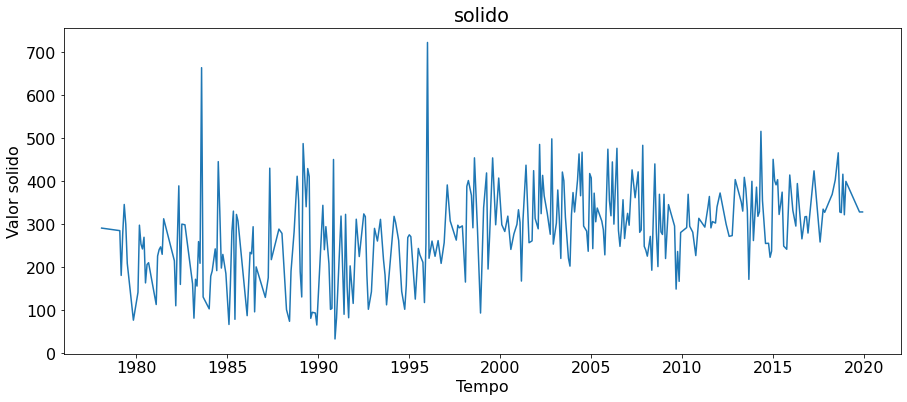

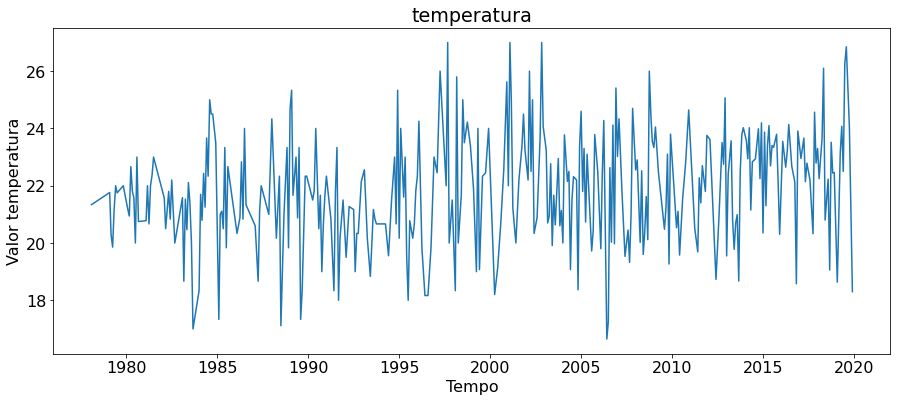

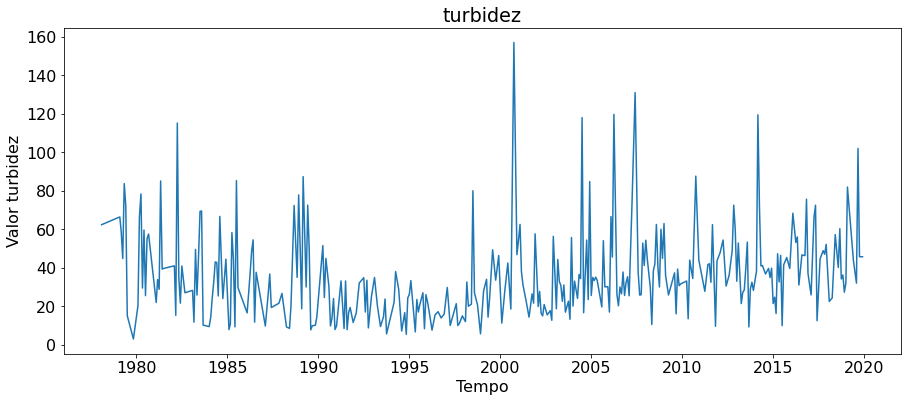

In [57]:
#Mostra os dados dos parâmetros graficamente.
for c in df06.columns:
    plt.plot(df06[c])
    plt.title(c)
    plt.xlabel('Tempo')
    plt.ylabel('Valor ' + c)
    plt.show()

In [58]:
df06.describe().round(2)

,ph,coliformes,dbo,fosforo,od,solido,temperatura,turbidez
count,503.00,503.00,503.00,503.00,503.00,503.00,503.00,503.00
mean,6.82,2303356.85,28.41,1.96,2.02,279.63,21.76,34.94
std,0.37,4396550.17,18.07,13.74,1.06,94.65,1.78,21.23
min,5.57,2.00,1.00,0.03,0.00,33.23,16.65,3.00
25%,6.58,595673.90,16.13,0.55,1.39,222.29,20.67,20.10
50%,6.86,1204785.71,26.65,0.89,1.99,287.00,21.70,31.49
75%,7.05,2545428.65,36.57,1.27,2.64,336.65,22.94,44.15
max,8.25,58250209.25,133.67,254.17,6.20,723.33,27.00,157.01


In [17]:
media = df06.mean()

#for dataset in [df06]:
    #dataset.loc[dataset['od'] == 0, 'od'] = media.od
    
df06.loc[df06['od'] == 0, 'od'] = media.od

#trainingd = dataset

#df06 = dataset[(dataset.od == media.od)]

df06.describe()

,ph,coliformes,dbo,fosforo,od,solido,temperatura,turbidez
count,503.000000,5.030000e+02,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,6.817531,2.303357e+06,28.412871,1.964218,2.031342,279.628709,21.761966,34.939430
std,0.368289,4.396550e+06,18.068361,13.741776,1.051060,94.653632,1.776106,21.231702
min,5.575000,2.000000e+00,1.000000,0.033000,0.035000,33.233333,16.650000,3.000000
25%,6.579076,5.956739e+05,16.125137,0.552080,1.410596,222.291667,20.666667,20.103333
50%,6.865000,1.204786e+06,26.645299,0.894889,2.003750,287.000000,21.700000,31.494444
75%,7.049863,2.545429e+06,36.573257,1.267222,2.637024,336.645467,22.945000,44.149444
max,8.245000,5.825021e+07,133.666667,254.171125,6.200000,723.333333,27.000000,157.011111


Dados da UGRHI 06


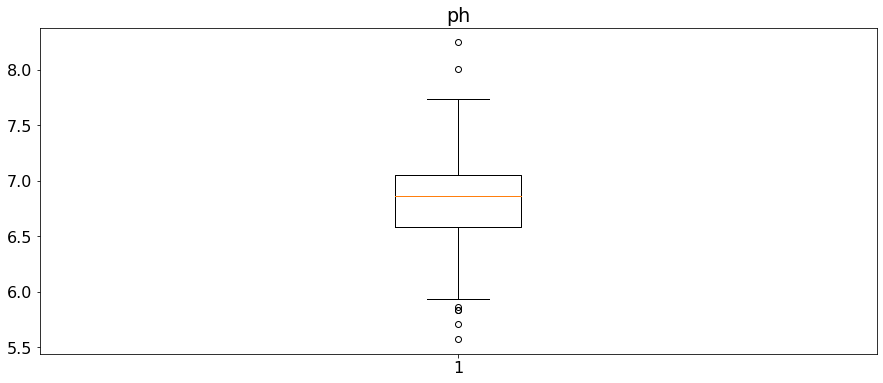

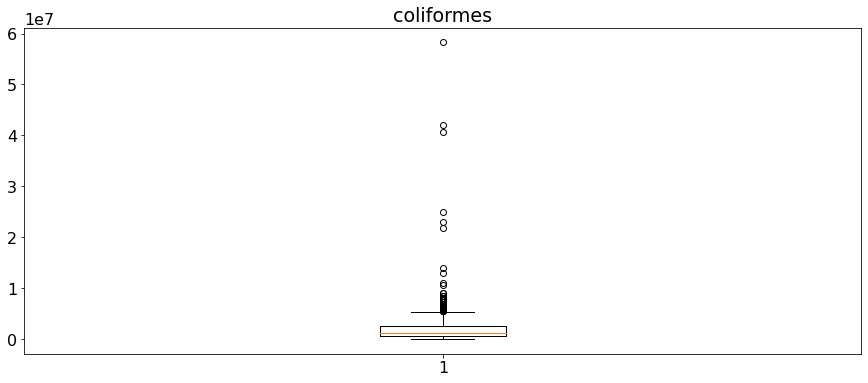

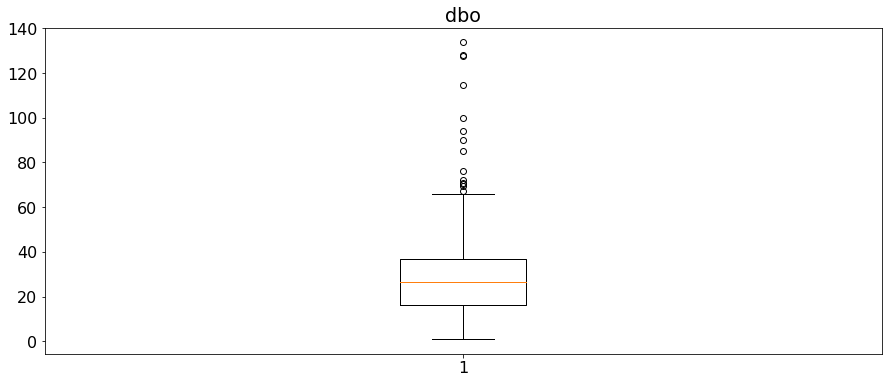

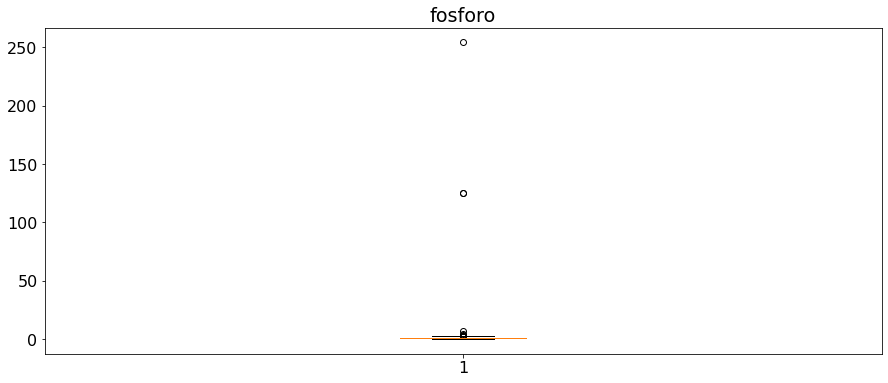

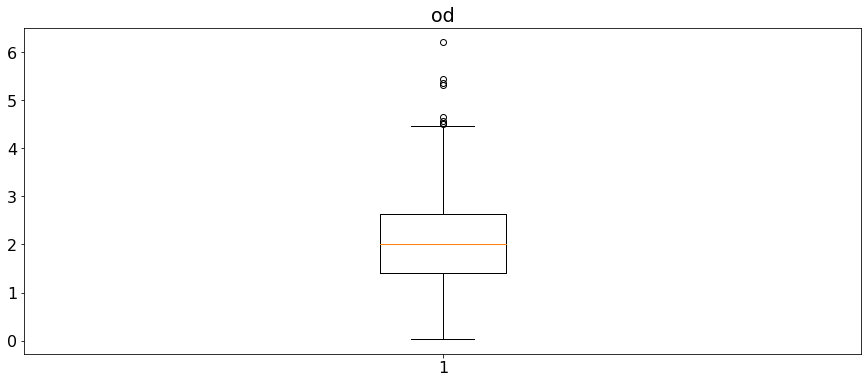

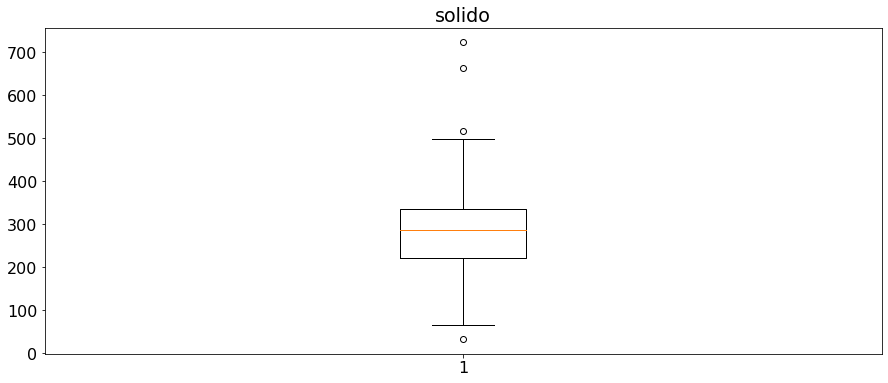

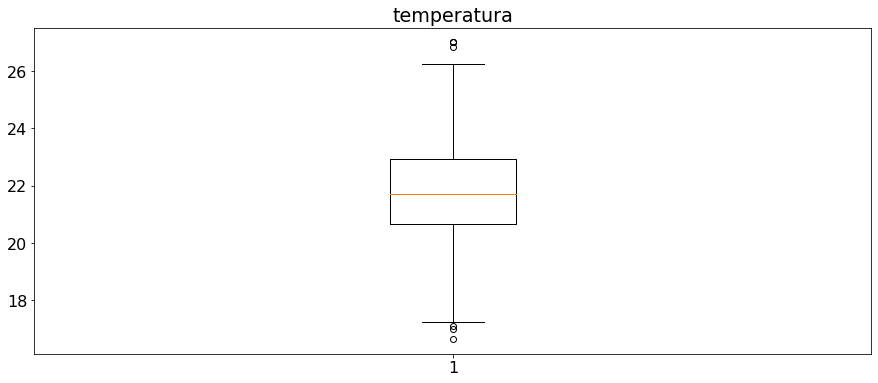

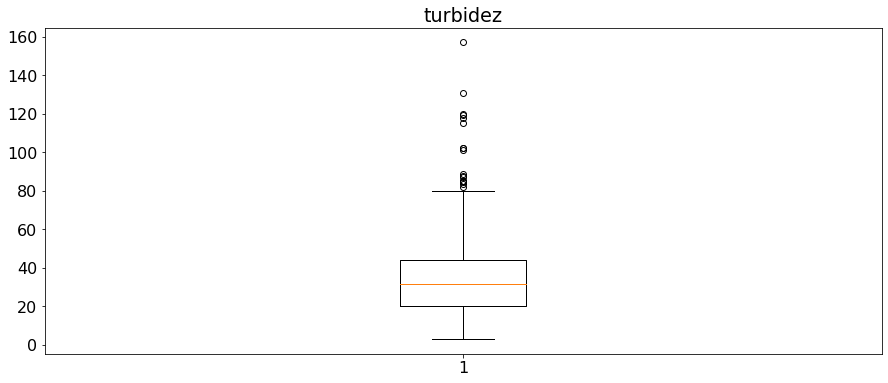

In [18]:
#Mostra os outlier dos valores de cada parâmetro da UGRHI06 após redimensionamento mensal
print('Dados da UGRHI 06')
#Mostra os dados por parâmetro
for c in df06.columns:
    fig4,ax4 = plt.subplots()
    ax4.set_title(c)
    ax4.boxplot(df06[c])

In [19]:
#Funções que calculam os valores superior e inferior do boxplot. Também calcula o valor médio dos parâmetros.
def outlier_superior(vparametro,df):
    #Ordena o dataframe
    trainingds = df.sort_values(vparametro,axis=0)

    tamanho = len(trainingds)
   
    #Calcula o 1Q, ou seja, os primeiros 25% do diagrama de caixa.
    primeiro_quartil = trainingds.quantile(q=0.25, axis=0, numeric_only=True, interpolation='linear')
    #Calcula o 3Q, ou seja, 75% do diagrama de caixa.
    terceiro_quartil = trainingds.quantile(q=0.75, axis=0, numeric_only=True, interpolation='linear')

    #Calcula-se o interquartil(FIQ).
    fig = terceiro_quartil - primeiro_quartil
    
    #Calcula o limite superior.
    superior = terceiro_quartil + (1.5*fig)
    
    return superior

def outlier_inferior(vparametro,df):
    #Ordena o dataframe
    trainingds = df.sort_values(vparametro,axis=0)

    tamanho = len(trainingds)
    
    #Calcula o 1Q, ou seja, os primeiros 25% do diagrama de caixa.
    primeiro_quartil = trainingds.quantile(q=0.25, axis=0, numeric_only=True, interpolation='linear')
    #Calcula o 3Q, ou seja, 75% do diagrama de caixa.
    terceiro_quartil = trainingds.quantile(q=0.75, axis=0, numeric_only=True, interpolation='linear')
      
    #Calcula-se o interquartil(FIQ).
    fig = terceiro_quartil - primeiro_quartil
    
    #Calcula o limite inferior.
    inferior = primeiro_quartil - (1.5*fig)
           
    return inferior

def media_coluna(vparametro,df):
    tamanho = len(df)
    
    soma = 0
    
    for i in range(tamanho):
        soma = soma + df[vparametro][i]
    
    #calcula o Valor medio da coluna
    media = soma / tamanho
        
    return media

Dados da UGRHI 06


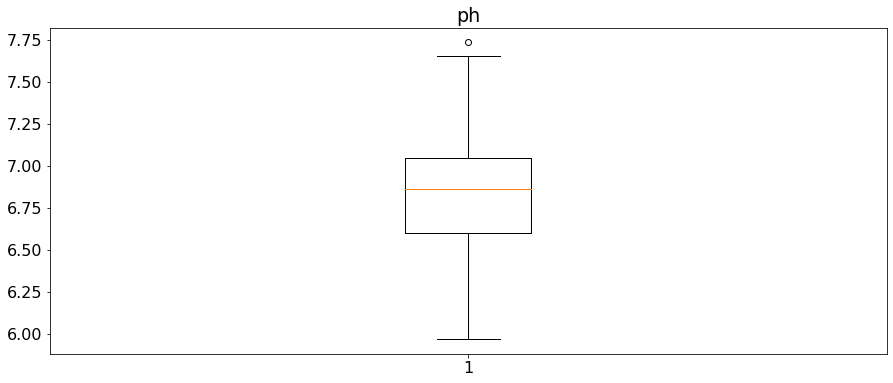

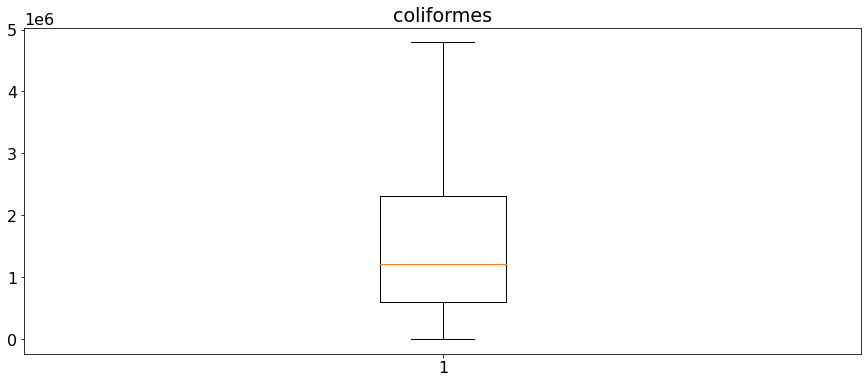

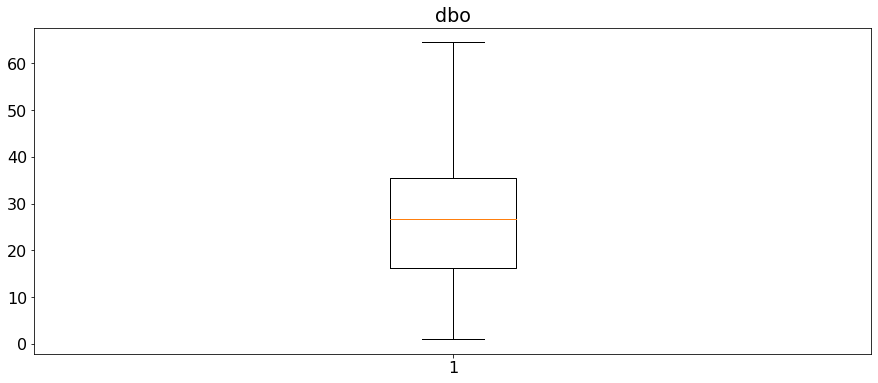

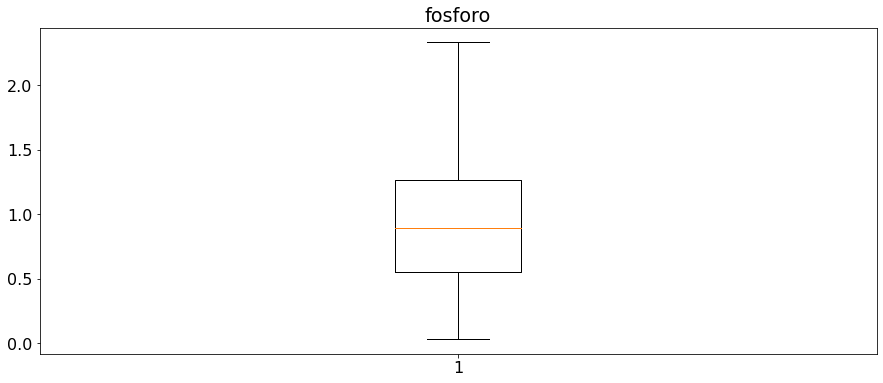

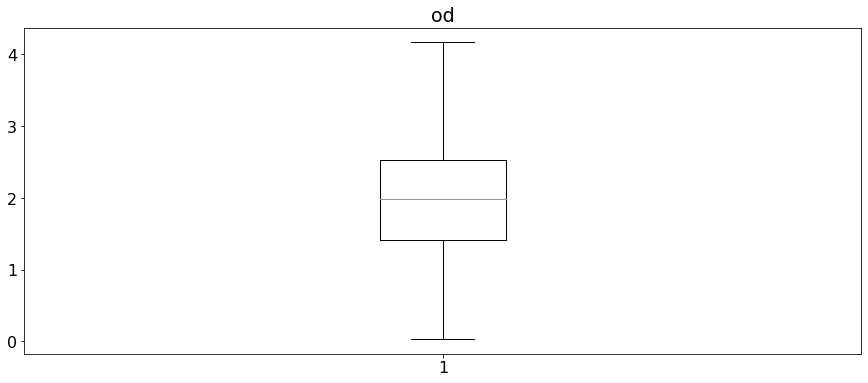

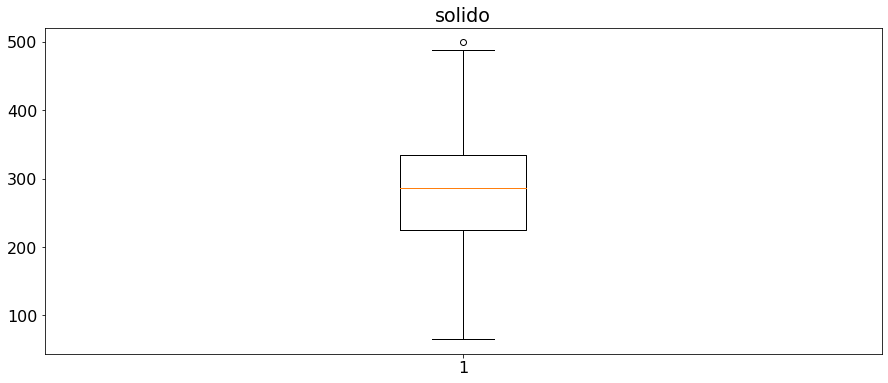

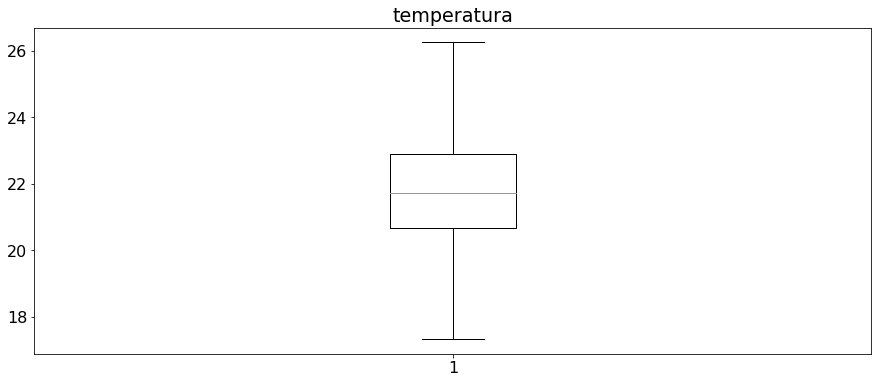

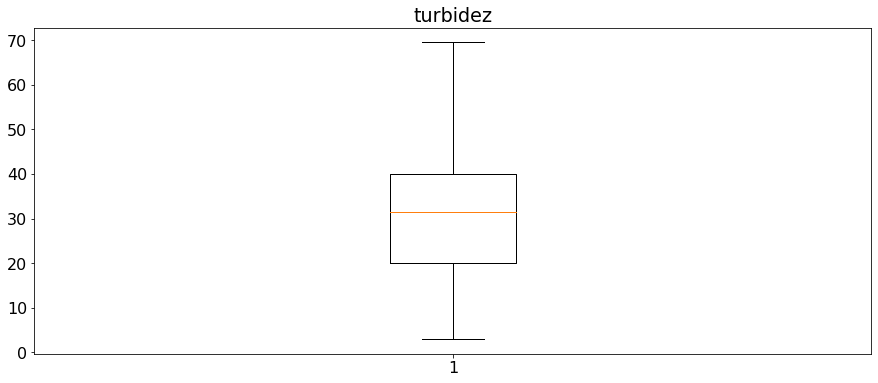

In [20]:
#O parâmetro OD não necessita de tratamento de outlier por não apresentar valores fora do padrão no boxplot da UGRHI 06
for i in ('ph','coliformes', 'dbo','fosforo','od','solido','temperatura','turbidez'):
    
    if (i == 'coliformes'):
        outs = outlier_superior(i,df06)[1]
        regs = len(df06[(df06.coliformes > outs)])
                
        outi = outlier_inferior(i,df06)[1]
        regi = len(df06[(df06.coliformes < outi)])
    
           
        while (regs > 0):
            df06.loc[df06[i] > outlier_superior(i,df06)[1],i] = media_coluna(i,df06)
            outs = outlier_superior(i,df06)[1]
            regs = len(df06[(df06.coliformes > outs)]) 
        
        while (regi > 0):
            df06.loc[df06[i] < outlier_inferior(i,df06)[1],i] = media_coluna(i,df06)
            outi = outlier_inferior(i,df06)[1]
            regi = len(df06[(df06.coliformes < outi)])
            
        media = media_coluna(i,df06)
                        
    elif(i == 'dbo'):
        outs = outlier_superior(i,df06)[2]
        regs = len(df06[(df06.dbo > outs)])
        
        outi = outlier_inferior(i,df06)[2]
        regi = len(df06[(df06.dbo < outi)])
    
        while (regs > 0):
            df06.loc[df06[i] > outlier_superior(i,df06)[2],i] = media_coluna(i,df06)
            outs = outlier_superior(i,df06)[2]
            regs = len(df06[(df06.dbo > outs)])
        
        while (regi > 0):
            df06.loc[df06[i] < outlier_inferior(i,df06)[2],i] = media_coluna(i,df06)
            outi = outlier_inferior(i,df06)[2]
            regi = len(df06[(df06.dbo < outi)])
            
        media = media_coluna(i,df06)
                
    elif(i == 'fosforo'):
        
        outs = outlier_superior(i,df06)[3]
        regs = len(df06[(df06.fosforo > outs)])
        
        outi = outlier_inferior(i,df06)[3]
        regi = len(df06[(df06.fosforo < outi)])
    
        while (regs > 0):
            df06.loc[df06[i] > outlier_superior(i,df06)[3],i] = media_coluna(i,df06)
            outs = outlier_superior(i,df06)[3]
            regs = len(df06[(df06.fosforo > outs)])
        
        while (regi > 0):
            df06.loc[df06[i] < outlier_inferior(i,df06)[3],i] = media_coluna(i,df06)
            outi = outlier_inferior(i,df06)[3]
            regi = len(df06[(df06.fosforo < outi)])
            
        media = media_coluna(i,df06)
                
    elif(i == 'ph'):
        
        outs = outlier_superior(i,df06)[0]
        regs = len(df06[(df06.ph > outs)])
        
        outi = outlier_inferior(i,df06)[0]
        regi = len(df06[(df06.ph < outi)])
    
        while (regs > 0):
            df06.loc[df06[i] > outlier_superior(i,df06)[0],i] = media_coluna(i,df06)
            outs = outlier_superior(i,df06)[0]
            regs = len(df06[(df06.ph > outs)])
        
        while (regi > 0):
            df06.loc[df06[i] < outlier_inferior(i,df06)[0],i] = media_coluna(i,df06)
            outi = outlier_inferior(i,df06)[0]
            regi = len(df06[(df06.ph < outi)])
            
        media = media_coluna(i,df06)
                
    elif(i == 'solido'):
        
        outs = outlier_superior(i,df06)[5]
        regs = len(df06[(df06.solido > outs)])
        
        outi = outlier_inferior(i,df06)[5]
        regi = len(df06[(df06.solido < outi)])
    
        while (regs > 0):
            df06.loc[df06[i] > outlier_superior(i,df06)[5],i] = media_coluna(i,df06)
            outs = outlier_superior(i,df06)[5]
            regs = len(df06[(df06.solido > outs)])
        
        while (regi > 0):
            df06.loc[df06[i] < outlier_inferior(i,df06)[5],i] = media_coluna(i,df06)
            outi = outlier_inferior(i,df06)[5]
            regi = len(df06[(df06.solido < outi)])
            
        media = media_coluna(i,df06)
                
    elif(i == 'temperatura'):
        
        outs = outlier_superior(i,df06)[6]
        regs = len(df06[(df06.temperatura > outs)])
        
        outi = outlier_inferior(i,df06)[6]
        regi = len(df06[(df06.temperatura < outi)])
    
        while (regs > 0):
            df06.loc[df06[i] > outlier_superior(i,df06)[6],i] = media_coluna(i,df06)
            outs = outlier_superior(i,df06)[6]
            regs = len(df06[(df06.temperatura > outs)])
        
        while (regi > 0):
            df06.loc[df06[i] < outlier_inferior(i,df06)[6],i] = media_coluna(i,df06)
            outi = outlier_inferior(i,df06)[6]
            regi = len(df06[(df06.temperatura < outi)])
            
        media = media_coluna(i,df06)
        
    elif(i == 'od'):
        
        outs = outlier_superior(i,df06)[4]
        regs = len(df06[(df06.od > outs)])
        
        outi = outlier_inferior(i,df06)[4]
        regi = len(df06[(df06.od < outi)])
    
        while (regs > 0):
            df06.loc[df06[i] > outlier_superior(i,df06)[4],i] = media_coluna(i,df06)
            outs = outlier_superior(i,df06)[4]
            regs = len(df06[(df06.od > outs)])
        
        while (regi > 0):
            df06.loc[df06[i] < outlier_inferior(i,df06)[4],i] = media_coluna(i,df06)
            outi = outlier_inferior(i,df06)[4]
            regi = len(df06[(df06.od < outi)])
            
        media = media_coluna(i,df06)
                        
    else:
        
        
        outs = outlier_superior(i,df06)[7]
        regs = len(df06[(df06.turbidez > outs)])
        
        outi = outlier_inferior(i,df06)[7]
        regi = len(df06[(df06.turbidez < outi)])
    
        while (regs > 0):
            df06.loc[df06[i] > outlier_superior(i,df06)[7],i] = media_coluna(i,df06)
            outs = outlier_superior(i,df06)[7]
            regs = len(df06[(df06.turbidez > outs)])
        
        while (regi > 0):
            df06.loc[df06[i] < outlier_inferior(i,df06)[7],i] = media_coluna(i,df06)
            outi = outlier_inferior(i,df06)[7]
            regi = len(df06[(df06.turbidez < outi)])
            
        media = media_coluna(i,df06) 
             

#Mostra os outlier dos valores de cada parâmetro da UGRHI06 após redimensionamento semanal
print('Dados da UGRHI 06')
#Mostra os dados por parâmetro
for c in df06.columns:
    fig4,ax4 = plt.subplots()
    ax4.set_title(c)
    ax4.boxplot(df06[c])

In [116]:
df06.to_csv (r'C:\Users\Anderson\predicaoagua\src\concatenacao_dados_cetesb\cetesb_concatenado06semoutliers.csv', index = True, header=True)

In [24]:
df06.describe()

,ph,coliformes,dbo,fosforo,od,solido,temperatura,turbidez
count,503.000000,5.030000e+02,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,6.822701,1.473267e+06,26.388188,0.944103,1.954166,277.556460,21.758127,31.451565
std,0.338119,1.123318e+06,13.543739,0.528385,0.937730,89.100757,1.660766,14.915439
min,5.967683,2.000000e+00,1.000000,0.033000,0.035000,65.666667,17.327869,3.000000
25%,6.600000,5.956739e+05,16.125137,0.552080,1.410596,224.212121,20.666667,20.103333
50%,6.862500,1.204786e+06,26.620984,0.894889,1.986250,286.387243,21.720610,31.494444
75%,7.042598,2.303357e+06,35.576711,1.267222,2.534643,333.198087,22.906960,40.081325
max,7.650000,4.791866e+06,64.500000,2.330000,4.166667,488.000000,26.250000,69.466667


UGRHI06


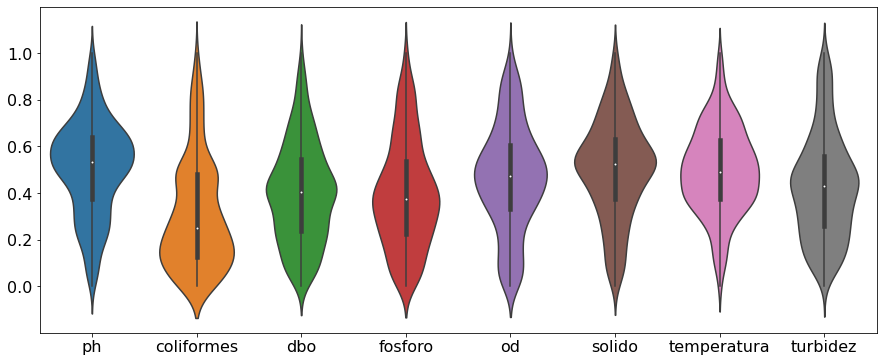

In [25]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
df06_padronizado = sc.fit_transform(df06)

ph          = []
coliformes  = []
dbo         = []
fosforo     = []
od          = []
solido      = []
temperatura = []
turbidez    = []

for i in range(0,8):#coluna
    for j in range(0,len(df06_padronizado)): #linha
        if (i == 0):
            ph.append(df06_padronizado[j][i]) 
        elif (i == 1):
            coliformes.append(df06_padronizado[j][i])
        elif (i == 2):
            dbo.append(df06_padronizado[j][i])
        elif (i == 3):
            fosforo.append(df06_padronizado[j][i])
        elif (i == 4):
            od.append(df06_padronizado[j][i])
        elif (i == 5):
            solido.append(df06_padronizado[j][i])
        elif (i == 6):
            temperatura.append(df06_padronizado[j][i])
        else:
            turbidez.append(df06_padronizado[j][i])

dict = {'ph':ph,'coliformes':coliformes,'dbo':dbo,'fosforo':fosforo,'od':od,'solido':solido,'temperatura':temperatura,'turbidez':turbidez}

df06_pad = pd.DataFrame(dict)
print("UGRHI06")
ax = sns.violinplot(data=df06_pad)
plt.rcParams["figure.figsize"] = (15,6)

#0.16872891
#df06_padronizado[500][2]

Gráfico das correlações - UGRHI10


Para as predições do parâmetro pH vamos considerar os coenficientes maiores de 0.50 (positivo ou negativo indica uma correlação de moderada à forte.)


Parâmetros eleitos correlacionados a pH: DBO, PH, SOLIDO.


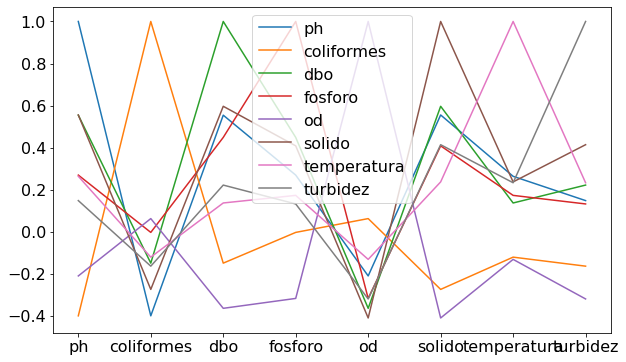

In [26]:
print("Gráfico das correlações - UGRHI06")
print("\n")
plt.rcParams["figure.figsize"] = (10,6)
df06.corr().plot()
print("Para as predições do parâmetro pH vamos considerar os coenficientes maiores de 0.50 (positivo ou negativo indica uma correlação de moderada à forte.)")
print("\n")
print("Parâmetros eleitos correlacionados a pH: DBO, PH, SOLIDO.")

In [27]:
df06.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,ph,coliformes,dbo,fosforo,od,solido,temperatura,turbidez
ph,1.0,-0.4,0.55,0.27,-0.21,0.56,0.26,0.15
coliformes,-0.4,1.0,-0.15,-0.0033,0.062,-0.27,-0.12,-0.16
dbo,0.55,-0.15,1.0,0.45,-0.36,0.6,0.14,0.22
fosforo,0.27,-0.0033,0.45,1.0,-0.32,0.41,0.17,0.13
od,-0.21,0.062,-0.36,-0.32,1.0,-0.41,-0.13,-0.32
solido,0.56,-0.27,0.6,0.41,-0.41,1.0,0.24,0.41
temperatura,0.26,-0.12,0.14,0.17,-0.13,0.24,1.0,0.23
turbidez,0.15,-0.16,0.22,0.13,-0.32,0.41,0.23,1.0


# Pré-processamento dos dados da UGRHI10

In [28]:
#dfp06 = pd.DataFrame() # Refere-se aos dados da UGRHI 06
dfp10 = pd.DataFrame() # Refere-se aos dados da UGRHI 10

for i in ('solido','ph','coliformes', 'dbo','fosforo','nitrogenio','od','temperatura','turbidez'):
    
    str_files = i
    #Carrega os dados do arquivo .csv
    df = pd.read_csv(str_files + '.CSV',encoding='utf-8',sep=';')
      
    #Seleciona os dados da UGRHI 10 - SOROCABA/MEDIO TIETE e UGRHI 06 - ALTO TIÊTE
    #z06 = df.loc[df['UGRHI'] == '06 - ALTO TIÊTE']
    z10 = df.loc[df['UGRHI'] == '10 - SOROCABA/MEDIO TIETE']
              
    #dfp06['dt_coleta_'+i] =  z06['data_coleta']
    #dfp06[i]     =  z06['valor']
    
    dfp10['dt_coleta_'+i] =  z10['data_coleta']
    dfp10[i]     =  z10['valor']
    
dfp10   

,dt_coleta_solido,solido,dt_coleta_ph,ph,dt_coleta_coliformes,coliformes,dt_coleta_dbo,dbo,dt_coleta_fosforo,fosforo,dt_coleta_nitrogenio,nitrogenio,dt_coleta_od,od,dt_coleta_temperatura,temperatura,dt_coleta_turbidez,turbidez
0,08/02/1995,184.0,08/02/1995,6.90,08/02/1995,1700.0,08/02/1995,4.0,08/02/1995,0.238,NaN,NaN,08/02/1995,2.8,08/02/1995,22.0,08/02/1995,70.0
1,03/04/1995,142.0,03/04/1995,6.70,03/04/1995,200.0,03/04/1995,5.0,03/04/1995,0.112,NaN,NaN,03/04/1995,3.2,03/04/1995,24.0,03/04/1995,16.0
2,24/05/1995,152.0,24/05/1995,6.60,24/05/1995,200.0,24/05/1995,6.0,24/05/1995,0.085,NaN,NaN,24/05/1995,3.2,24/05/1995,20.0,24/05/1995,4.3
3,26/06/1995,159.0,26/06/1995,6.60,26/06/1995,200.0,26/06/1995,3.0,26/06/1995,0.200,NaN,NaN,26/06/1995,4.5,26/06/1995,19.0,26/06/1995,2.5
4,12/07/1995,160.0,12/07/1995,6.60,12/07/1995,200.0,12/07/1995,5.0,12/07/1995,0.120,NaN,NaN,12/07/1995,2.6,12/07/1995,19.0,12/07/1995,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616,03/05/2018,364.0,02/07/2014,7.18,NaN,NaN,03/03/2016,14.0,NaN,NaN,NaN,NaN,NaN,NaN,02/07/2014,20.1,NaN,NaN
3617,12/07/2018,402.0,24/09/2014,7.29,NaN,NaN,04/05/2016,27.0,NaN,NaN,NaN,NaN,NaN,NaN,24/09/2014,24.0,NaN,NaN
3618,25/09/2018,330.0,05/11/2014,7.35,NaN,NaN,27/07/2016,33.0,NaN,NaN,NaN,NaN,NaN,NaN,05/11/2014,25.2,NaN,NaN
3619,21/11/2018,204.0,22/01/2015,7.35,NaN,NaN,29/09/2016,28.0,NaN,NaN,NaN,NaN,NaN,NaN,22/01/2015,26.9,NaN,NaN


In [29]:
#Mostra a quantidade de NaN no dataframe
for field in dfp10.columns:
    print(field, 'NaN:', dfp10[field].isnull().sum())

dt_coleta_solido NaN: 0
solido NaN: 0
dt_coleta_ph NaN: 27
ph NaN: 27
dt_coleta_coliformes NaN: 631
coliformes NaN: 631
dt_coleta_dbo NaN: 31
dbo NaN: 31
dt_coleta_fosforo NaN: 75
fosforo NaN: 75
dt_coleta_nitrogenio NaN: 1402
nitrogenio NaN: 1402
dt_coleta_od NaN: 267
od NaN: 267
dt_coleta_temperatura NaN: 28
temperatura NaN: 28
dt_coleta_turbidez NaN: 20
turbidez NaN: 20


In [30]:
dfp10.describe()

,solido,ph,coliformes,dbo,fosforo,nitrogenio,od,temperatura,turbidez
count,1435.000000,1408.000000,8.040000e+02,1404.000000,1360.000000,33.000000,1168.000000,1407.000000,1415.000000
mean,276.982300,7.099773,1.706368e+05,16.170228,1.219982,15.420909,3.994598,23.224229,39.670198
std,186.868503,0.384341,1.441212e+06,13.549790,12.507754,7.914349,2.439988,3.268848,52.886334
min,3.000000,5.200000,1.000000e+00,1.000000,0.005000,2.570000,0.000000,2.000000,0.400000
25%,206.000000,6.900000,1.100000e+03,7.000000,0.280750,9.550000,2.200000,21.000000,12.000000
50%,252.000000,7.100000,7.700000e+03,13.000000,0.600000,14.500000,3.500000,23.000000,22.000000
75%,312.000000,7.300000,5.000000e+04,21.000000,1.250250,20.900000,6.000000,26.000000,42.365000
max,4840.000000,9.100000,3.500000e+07,138.000000,461.000000,34.400000,17.700000,33.000000,550.000000


In [31]:
'''
- Cria a coluna dt_coleta referente a data da coleta. Foi verificado que os parâmetros que possuem valores foram coletados 
na mesma data.

'''

dfp10['dt_coleta'] = dfp10['dt_coleta_ph']

#Remove as colunas que não serão utilizadas no experimento. Critério: Remoção das datas da coleta e colunas com NaN.
dfp10 = dfp10.drop(['dt_coleta_coliformes', 'dt_coleta_dbo','dt_coleta_fosforo','dt_coleta_nitrogenio','dt_coleta_od','dt_coleta_ph','dt_coleta_solido','dt_coleta_temperatura','dt_coleta_turbidez','nitrogenio'], axis=1)
dfp10

,solido,ph,coliformes,dbo,fosforo,od,temperatura,turbidez,dt_coleta
0,184.0,6.90,1700.0,4.0,0.238,2.8,22.0,70.0,08/02/1995
1,142.0,6.70,200.0,5.0,0.112,3.2,24.0,16.0,03/04/1995
2,152.0,6.60,200.0,6.0,0.085,3.2,20.0,4.3,24/05/1995
3,159.0,6.60,200.0,3.0,0.200,4.5,19.0,2.5,26/06/1995
4,160.0,6.60,200.0,5.0,0.120,2.6,19.0,2.5,12/07/1995
...,...,...,...,...,...,...,...,...,...
3616,364.0,7.18,NaN,14.0,NaN,NaN,20.1,NaN,02/07/2014
3617,402.0,7.29,NaN,27.0,NaN,NaN,24.0,NaN,24/09/2014
3618,330.0,7.35,NaN,33.0,NaN,NaN,25.2,NaN,05/11/2014
3619,204.0,7.35,NaN,28.0,NaN,NaN,26.9,NaN,22/01/2015


In [32]:
#Cria o index data_coleta
data_coleta = pd.to_datetime(dfp10['dt_coleta'])
data_coleta_index = pd.DatetimeIndex(data_coleta.values)
dfp10=dfp10.set_index(data_coleta_index)
dfp10.drop('dt_coleta',axis=1,inplace=True)

In [33]:
#Mostra a quantidade de NaN no dataframe
for field in dfp10.columns:
    print(field, 'NaN:', dfp10[field].isnull().sum())

solido NaN: 0
ph NaN: 27
coliformes NaN: 631
dbo NaN: 31
fosforo NaN: 75
od NaN: 267
temperatura NaN: 28
turbidez NaN: 20


In [34]:
#Agrupa os dados pela media mensal
df10 = dfp10.resample('M').mean()

UGRHI10


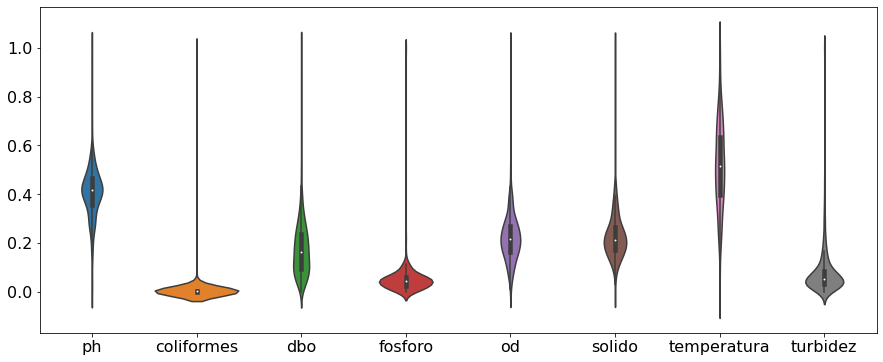

In [36]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
df10_padronizado = sc.fit_transform(df10)

ph          = []
coliformes  = []
dbo         = []
fosforo     = []
od          = []
solido      = []
temperatura = []
turbidez    = []

for i in range(0,8):#coluna
    for j in range(0,len(df10_padronizado)): #linha
        if (i == 0):
            solido.append(df10_padronizado[j][i]) 
        elif (i == 1):
            ph.append(df10_padronizado[j][i])
        elif (i == 2):
            coliformes.append(df10_padronizado[j][i])
        elif (i == 3):
            dbo.append(df10_padronizado[j][i])
        elif (i == 4):
            fosforo.append(df10_padronizado[j][i])
        elif (i == 5):
            od.append(df10_padronizado[j][i])
        elif (i == 6):
            temperatura.append(df10_padronizado[j][i])
        else:
            turbidez.append(df10_padronizado[j][i])

dict = {'ph':ph,'coliformes':coliformes,'dbo':dbo,'fosforo':fosforo,'od':od,'solido':solido,'temperatura':temperatura,'turbidez':turbidez}

df10_pad = pd.DataFrame(dict)

print("UGRHI10")
ax = sns.violinplot(data=df10_pad)
plt.rcParams["figure.figsize"] = (15,6)

In [37]:
#Mostra a quantidade de NaN no dataframe
for field in df10.columns:
    print(field, 'NaN:', df10[field].isnull().sum())

solido NaN: 132
ph NaN: 132
coliformes NaN: 194
dbo NaN: 133
fosforo NaN: 138
od NaN: 144
temperatura NaN: 132
turbidez NaN: 134


In [38]:
df10 = df10.interpolate(method="values")

In [39]:
#Mostra a quantidade de NaN no dataframe
for field in df10.columns:
    print(field, 'NaN:', df10[field].isnull().sum())       

solido NaN: 0
ph NaN: 0
coliformes NaN: 0
dbo NaN: 0
fosforo NaN: 0
od NaN: 0
temperatura NaN: 0
turbidez NaN: 0


In [40]:
df10

,solido,ph,coliformes,dbo,fosforo,od,temperatura,turbidez
1978-01-31,189.791667,6.687500,3535.833333,4.916667,19.478375,2.471667,21.791667,27.641667
1978-02-28,192.118607,6.705719,3439.495434,4.788813,18.004702,2.442676,21.951484,27.898333
1978-03-31,194.694863,6.725890,3332.835616,4.647260,16.373136,2.410579,22.128425,28.182500
1978-04-30,197.188014,6.745411,3229.616438,4.510274,14.794201,2.379517,22.299658,28.457500
1978-05-31,199.764269,6.765582,3122.956621,4.368721,13.162635,2.347420,22.476598,28.741667
...,...,...,...,...,...,...,...,...
2019-06-30,361.506122,7.356204,5700.000000,7.481633,0.197539,3.799184,24.995918,28.922449
2019-07-31,345.626531,7.281551,5700.000000,8.620408,0.195135,3.849796,25.248980,33.730612
2019-08-31,329.746939,7.206898,5700.000000,9.759184,0.192731,3.900408,25.502041,38.538776
2019-09-30,314.379592,7.134653,5700.000000,10.861224,0.190404,3.949388,25.746939,43.191837


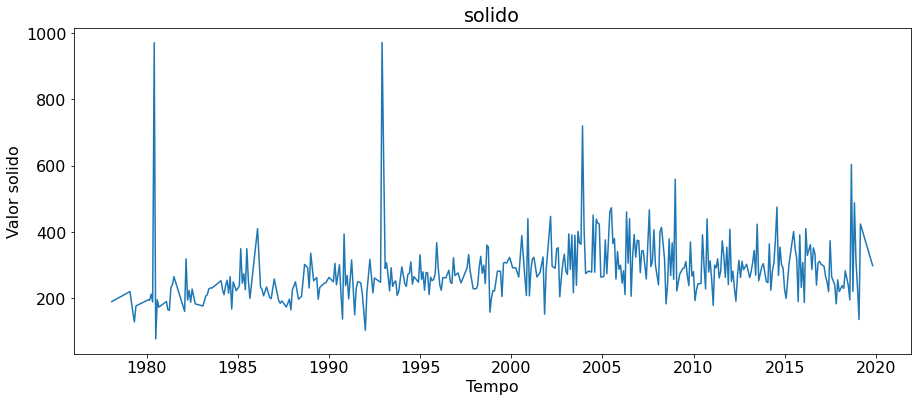

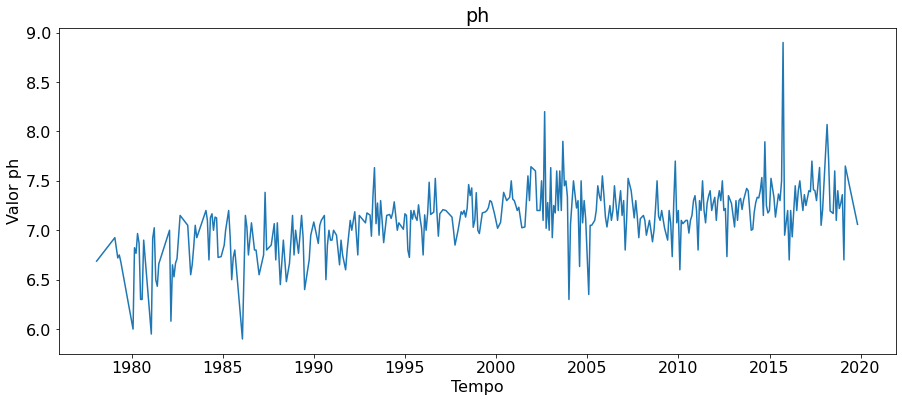

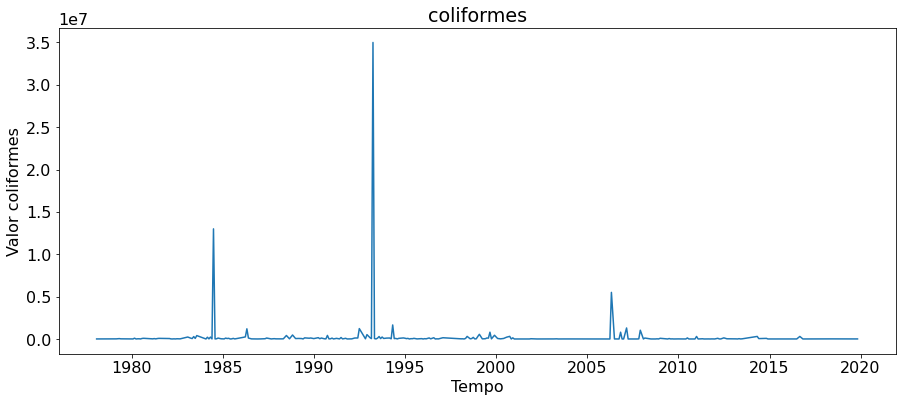

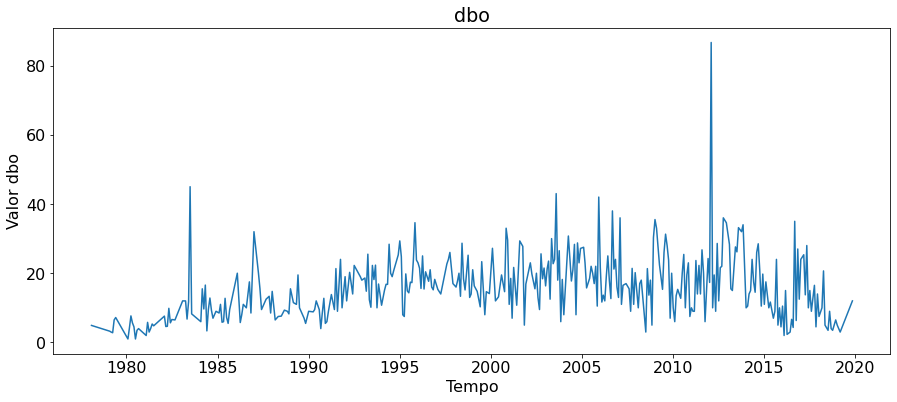

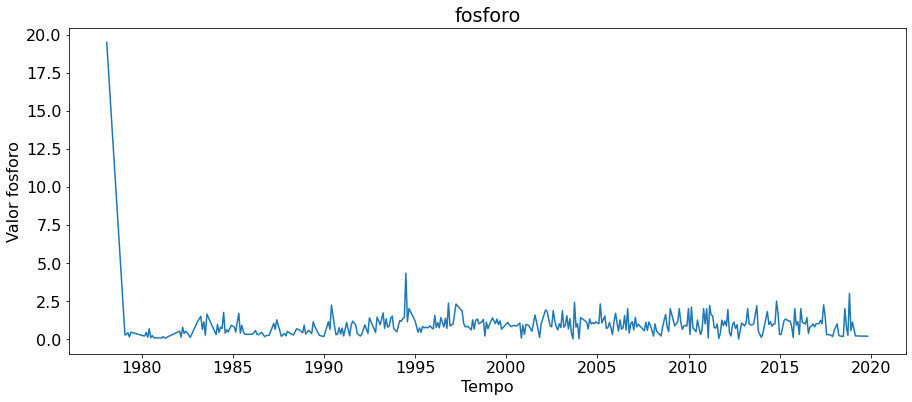

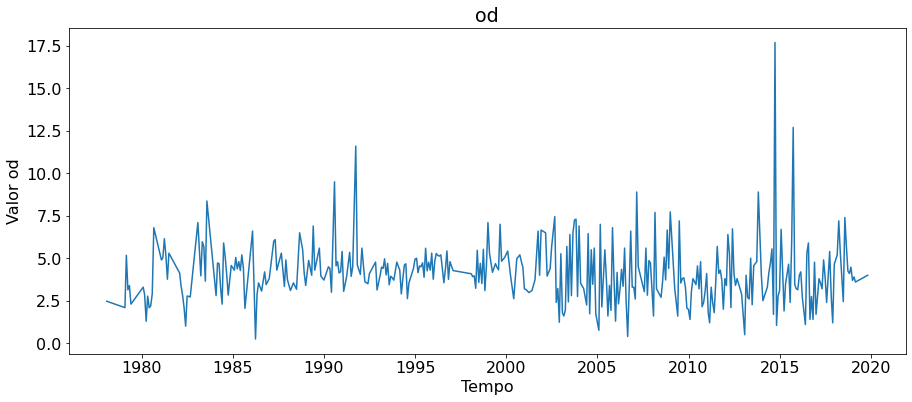

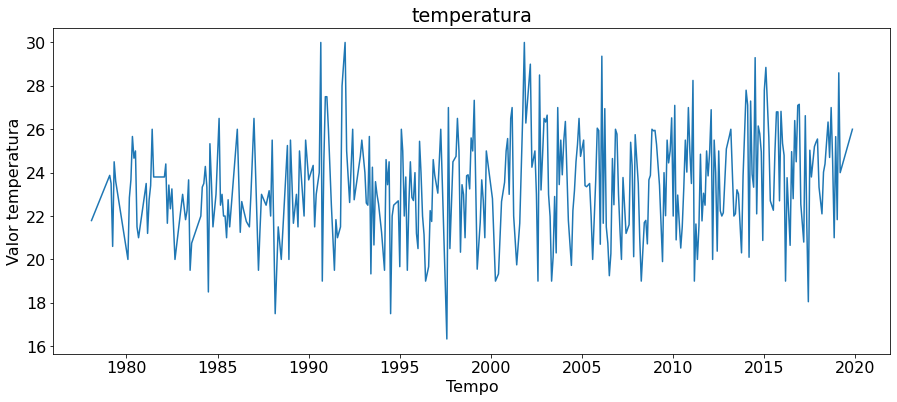

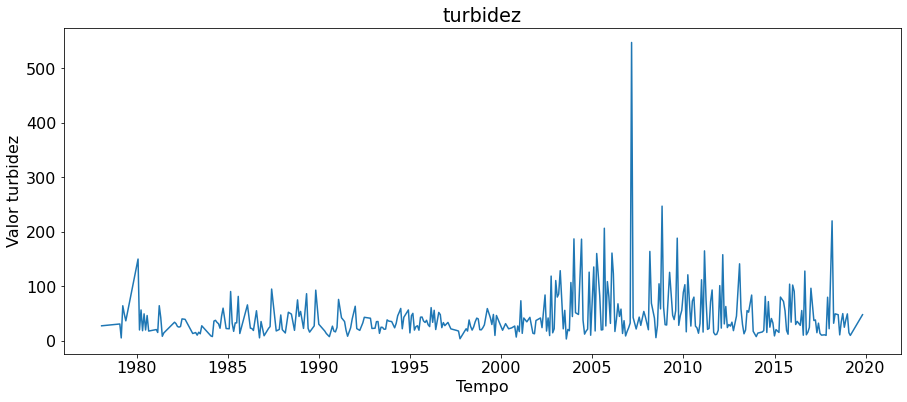

In [41]:
#Mostra os dados dos parâmetros graficamente.
for c in df10.columns:
    plt.plot(df10[c])
    plt.title(c)
    plt.xlabel('Tempo')
    plt.ylabel('Valor ' + c)
    plt.show()

In [42]:
df10.describe()

,solido,ph,coliformes,dbo,fosforo,od,temperatura,turbidez
count,502.000000,502.000000,5.020000e+02,502.000000,502.000000,502.000000,502.000000,502.000000
mean,275.917136,7.074374,1.860838e+05,14.873886,1.084160,4.128448,23.301134,42.835891
std,86.299967,0.325968,1.689985e+06,8.819114,1.821595,1.649413,2.263611,41.236148
min,77.000000,5.900000,1.000000e+00,1.000000,0.007000,0.250000,16.333333,3.500000
25%,226.000000,6.904486,3.510188e+03,8.250000,0.425375,3.161667,21.750000,20.425000
50%,262.550000,7.108734,1.693600e+04,13.901691,0.810085,4.014545,23.269890,31.234093
75%,306.150000,7.263566,7.571321e+04,20.000000,1.149327,4.858125,24.787755,49.500000
max,972.000000,8.900000,3.500000e+07,86.666667,19.478375,17.700000,30.000000,547.000000


Dados da UGRHI 10


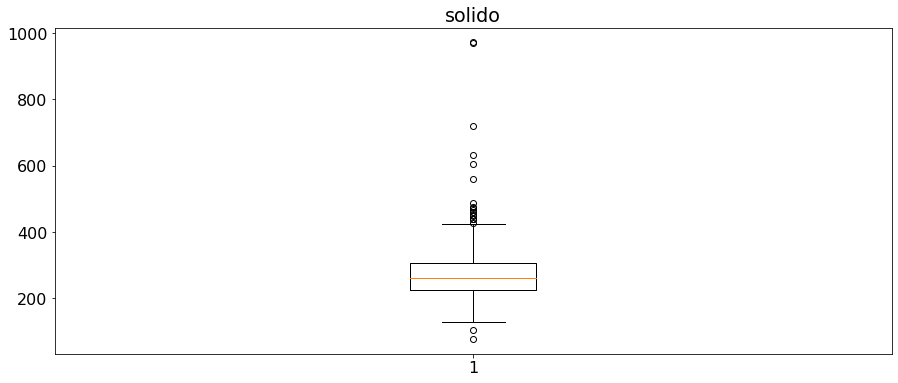

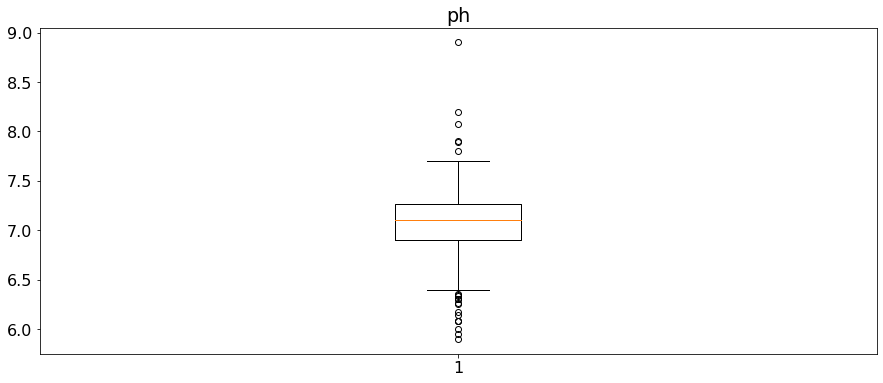

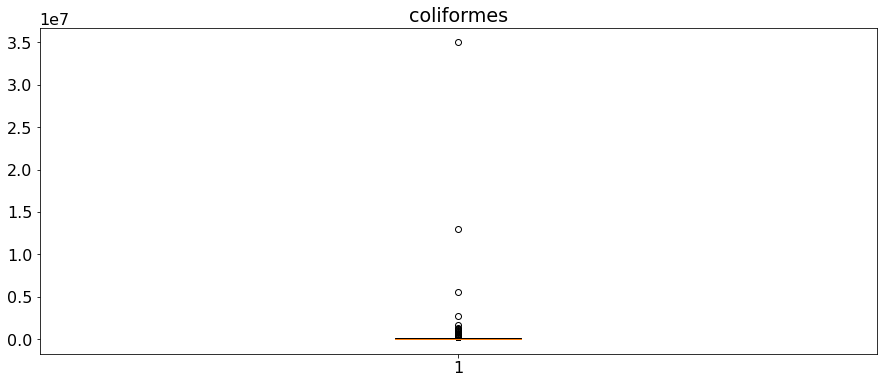

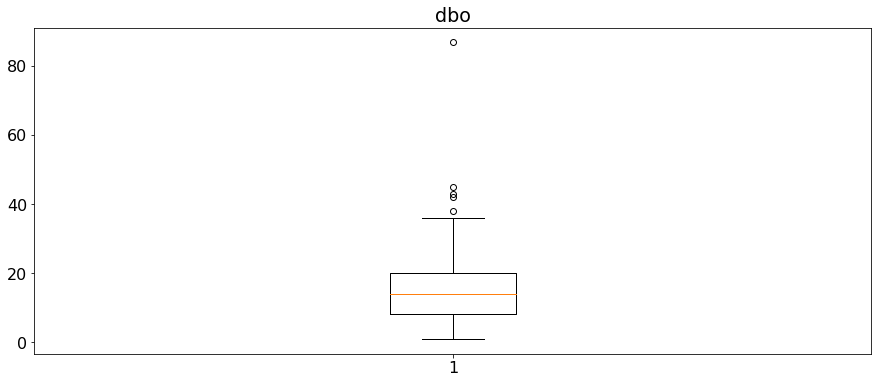

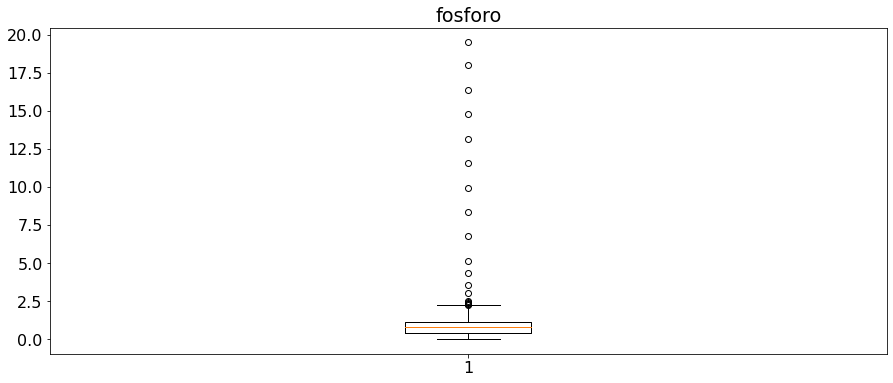

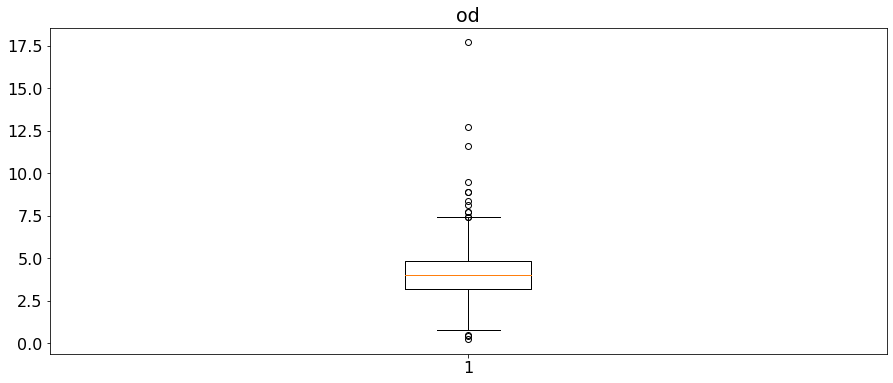

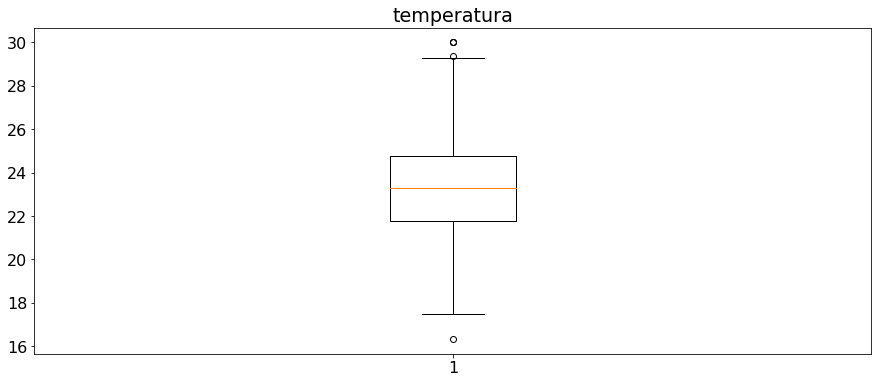

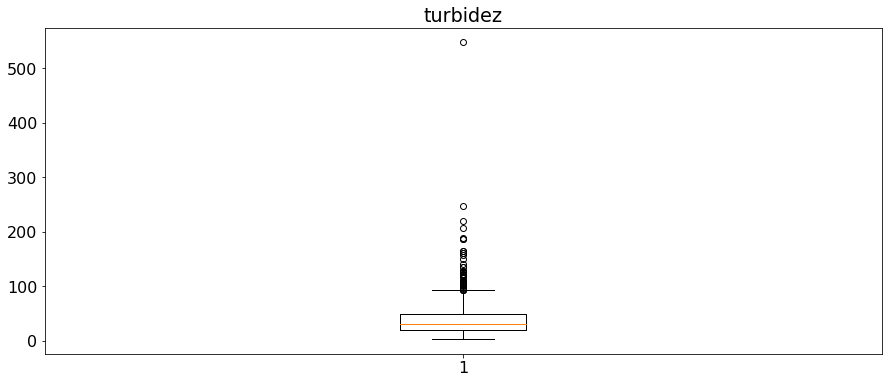

In [43]:
#Mostra os outlier dos valores de cada parâmetro da UGRHI10 após redimensionamento mensal
print('Dados da UGRHI 10')
#Mostra os dados por parâmetro
for c in df10.columns:
    fig4,ax4 = plt.subplots()
    ax4.set_title(c)
    ax4.boxplot(df10[c])

Dados da UGRHI 10


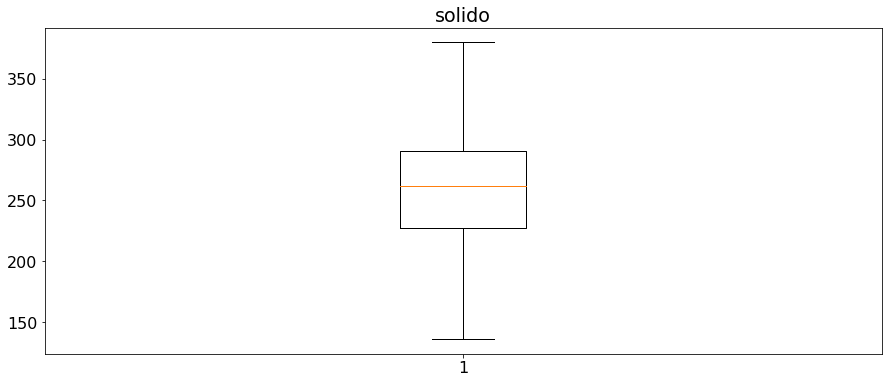

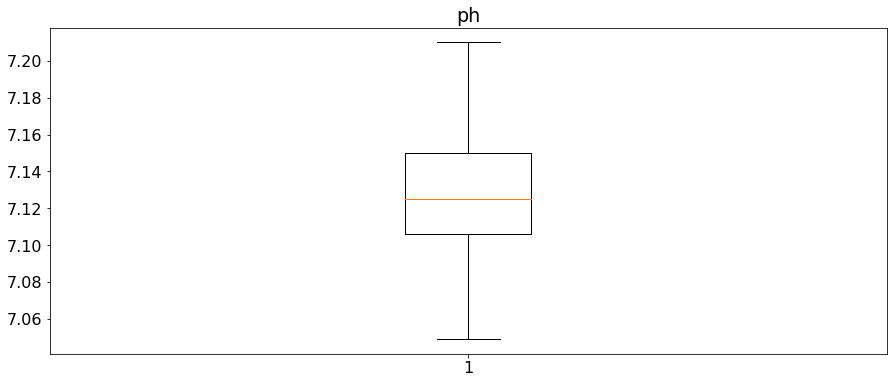

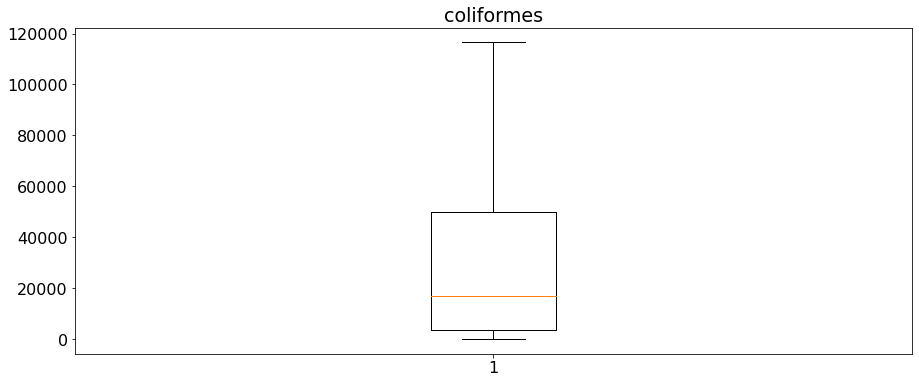

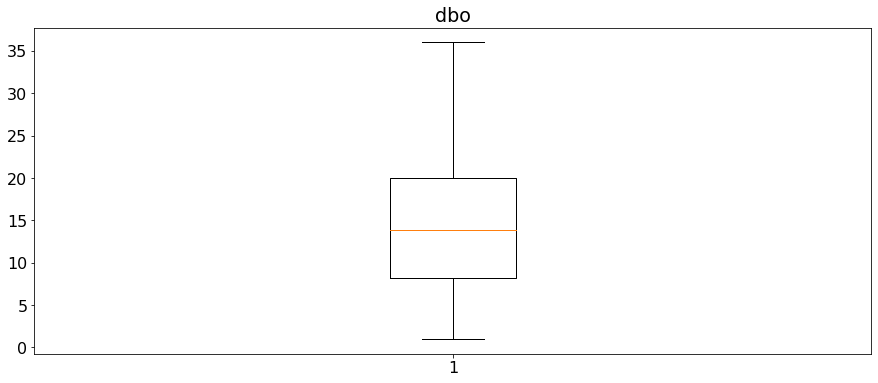

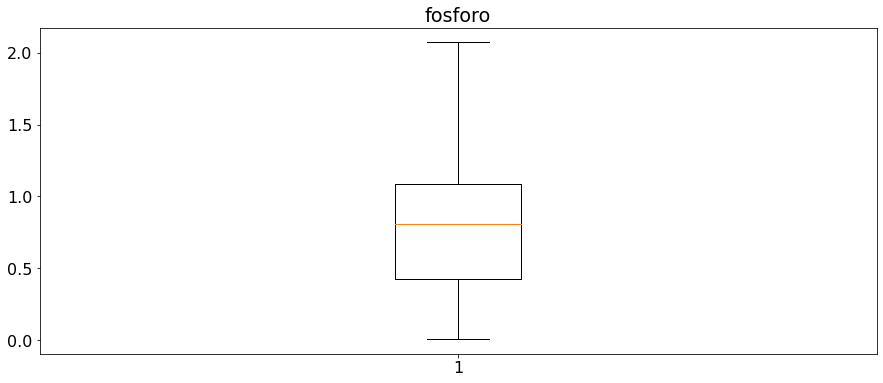

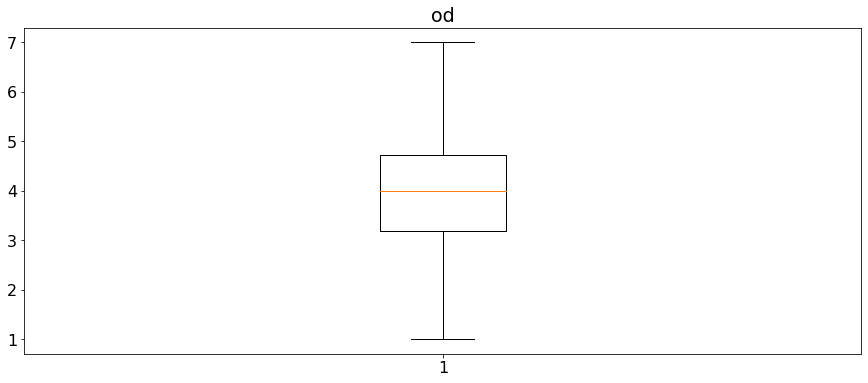

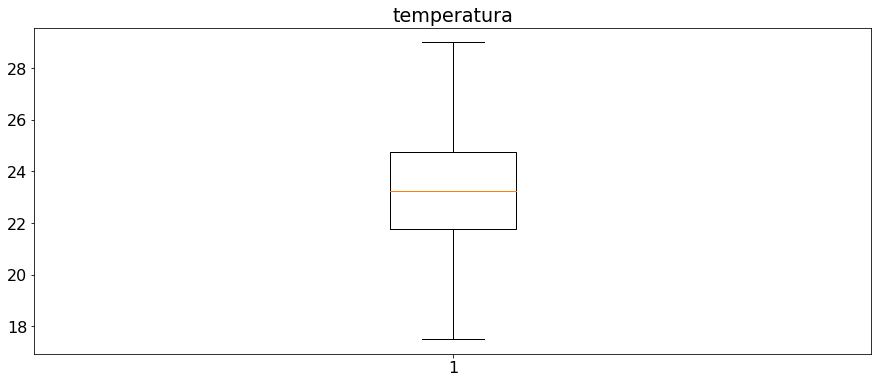

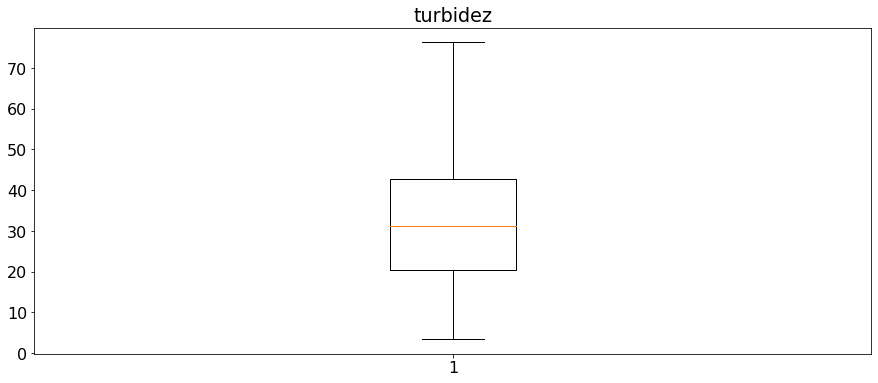

In [50]:
#O parâmetro OD não necessita de tratamento de outlier por não apresentar valores fora do padrão no boxplot da UGRHI 10
for i in ('solido','ph','coliformes', 'dbo','fosforo','od','temperatura','turbidez'):
    
    if (i == 'coliformes'):
        outs = outlier_superior(i,df10)[2]
        regs = len(df10[(df10.coliformes > outs)])
                
        outi = outlier_inferior(i,df10)[2]
        regi = len(df10[(df10.coliformes < outi)])
    
           
        while (regs > 0):
            df10.loc[df10[i] > outlier_superior(i,df10)[2],i] = media_coluna(i,df10)
            outs = outlier_superior(i,df10)[2]
            regs = len(df10[(df10.coliformes > outs)]) 
        
        while (regi > 0):
            df10.loc[df10[i] < outlier_inferior(i,df10)[2],i] = media_coluna(i,df10)
            outi = outlier_inferior(i,df10)[2]
            regi = len(df10[(df10.coliformes < outi)])
            
        media = media_coluna(i,df10)
                        
    elif(i == 'dbo'):
        outs = outlier_superior(i,df10)[3]
        regs = len(df10[(df10.dbo > outs)])
        
        outi = outlier_inferior(i,df10)[3]
        regi = len(df10[(df10.dbo < outi)])
    
        while (regs > 0):
            df10.loc[df10[i] > outlier_superior(i,df10)[3],i] = media_coluna(i,df10)
            outs = outlier_superior(i,df10)[3]
            regs = len(df10[(df10.dbo > outs)])
        
        while (regi > 0):
            df10.loc[df10[i] < outlier_inferior(i,df10)[3],i] = media_coluna(i,df10)
            outi = outlier_inferior(i,df10)[3]
            regi = len(df10[(df10.dbo < outi)])
            
        media = media_coluna(i,df06)
                
    elif(i == 'fosforo'):
        
        outs = outlier_superior(i,df10)[4]
        regs = len(df10[(df10.fosforo > outs)])
        
        outi = outlier_inferior(i,df10)[4]
        regi = len(df10[(df10.fosforo < outi)])
    
        while (regs > 0):
            df10.loc[df10[i] > outlier_superior(i,df10)[4],i] = media_coluna(i,df10)
            outs = outlier_superior(i,df10)[4]
            regs = len(df10[(df10.fosforo > outs)])
        
        while (regi > 0):
            df10.loc[df10[i] < outlier_inferior(i,df10)[4],i] = media_coluna(i,df10)
            outi = outlier_inferior(i,df10)[4]
            regi = len(df10[(df10.fosforo < outi)])
            
        media = media_coluna(i,df10)
                
    elif(i == 'ph'):
        
        outs = outlier_superior(i,df10)[1]
        regs = len(df10[(df10.ph > outs)])
        
        outi = outlier_inferior(i,df10)[1]
        regi = len(df10[(df10.ph < outi)])
    
        while (regs > 0):
            df10.loc[df10[i] > outlier_superior(i,df10)[1],i] = media_coluna(i,df10)
            outs = outlier_superior(i,df10)[1]
            regs = len(df10[(df10.ph > outs)])
        
        while (regi > 0):
            df10.loc[df10[i] < outlier_inferior(i,df10)[1],i] = media_coluna(i,df10)
            outi = outlier_inferior(i,df10)[1]
            regi = len(df10[(df10.ph < outi)])
            
        media = media_coluna(i,df10)
                
    elif(i == 'solido'):
        
        outs = outlier_superior(i,df10)[0]
        regs = len(df10[(df10.solido > outs)])
        
        outi = outlier_inferior(i,df10)[0]
        regi = len(df10[(df10.solido < outi)])
    
        while (regs > 0):
            df10.loc[df10[i] > outlier_superior(i,df10)[0],i] = media_coluna(i,df10)
            outs = outlier_superior(i,df10)[0]
            regs = len(df10[(df10.solido > outs)])
        
        while (regi > 0):
            df10.loc[df10[i] < outlier_inferior(i,df10)[0],i] = media_coluna(i,df10)
            outi = outlier_inferior(i,df10)[0]
            regi = len(df10[(df10.solido < outi)])
            
        media = media_coluna(i,df10)
                
    elif(i == 'temperatura'):
        
        outs = outlier_superior(i,df10)[6]
        regs = len(df10[(df10.temperatura > outs)])
        
        outi = outlier_inferior(i,df10)[6]
        regi = len(df10[(df10.temperatura < outi)])
    
        while (regs > 0):
            df10.loc[df10[i] > outlier_superior(i,df10)[6],i] = media_coluna(i,df10)
            outs = outlier_superior(i,df10)[6]
            regs = len(df10[(df10.temperatura > outs)])
        
        while (regi > 0):
            df10.loc[df10[i] < outlier_inferior(i,df10)[6],i] = media_coluna(i,df10)
            outi = outlier_inferior(i,df10)[6]
            regi = len(df10[(df10.temperatura < outi)])
            
        media = media_coluna(i,df10)
        
    elif(i == 'od'):
        
        outs = outlier_superior(i,df10)[5]
        regs = len(df10[(df10.od > outs)])
        
        outi = outlier_inferior(i,df10)[5]
        regi = len(df10[(df10.od < outi)])
    
        while (regs > 0):
            df10.loc[df10[i] > outlier_superior(i,df10)[5],i] = media_coluna(i,df10)
            outs = outlier_superior(i,df10)[5]
            regs = len(df10[(df10.od > outs)])
        
        while (regi > 0):
            df10.loc[df10[i] < outlier_inferior(i,df10)[5],i] = media_coluna(i,df10)
            outi = outlier_inferior(i,df10)[5]
            regi = len(df10[(df10.od < outi)])
            
        media = media_coluna(i,df10)
                        
    else:
        
        
        outs = outlier_superior(i,df10)[7]
        regs = len(df10[(df10.turbidez > outs)])
        
        outi = outlier_inferior(i,df10)[7]
        regi = len(df10[(df10.turbidez < outi)])
    
        while (regs > 0):
            df10.loc[df10[i] > outlier_superior(i,df10)[7],i] = media_coluna(i,df10)
            outs = outlier_superior(i,df10)[7]
            regs = len(df10[(df10.turbidez > outs)])
        
        while (regi > 0):
            df10.loc[df10[i] < outlier_inferior(i,df10)[7],i] = media_coluna(i,df10)
            outi = outlier_inferior(i,df10)[7]
            regi = len(df10[(df10.turbidez < outi)])
            
        media = media_coluna(i,df10) 
             

#Mostra os outlier dos valores de cada parâmetro da UGRHI10 após redimensionamento mensal
print('Dados da UGRHI 10')
#Mostra os dados por parâmetro
for c in df10.columns:
    fig4,ax4 = plt.subplots()
    ax4.set_title(c)
    ax4.boxplot(df10[c])

In [82]:
df10.to_csv (r'C:\Users\Anderson\predicaoagua\src\concatenacao_dados_cetesb\cetesb_concatenado10semoutliers.csv', index = True, header=True)

UGRHI10


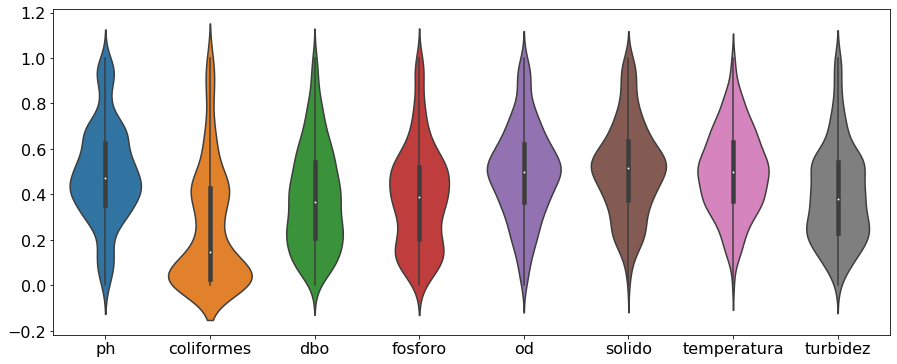

In [51]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
df10_padronizado = sc.fit_transform(df10)

ph          = []
coliformes  = []
dbo         = []
fosforo     = []
od          = []
solido      = []
temperatura = []
turbidez    = []

for i in range(0,8):#coluna
    for j in range(0,len(df10_padronizado)): #linha
        if (i == 0):
            solido.append(df10_padronizado[j][i]) 
        elif (i == 1):
            ph.append(df10_padronizado[j][i])
        elif (i == 2):
            coliformes.append(df10_padronizado[j][i])
        elif (i == 3):
            dbo.append(df10_padronizado[j][i])
        elif (i == 4):
            fosforo.append(df10_padronizado[j][i])
        elif (i == 5):
            od.append(df10_padronizado[j][i])
        elif (i == 6):
            temperatura.append(df10_padronizado[j][i])
        else:
            turbidez.append(df10_padronizado[j][i])

dict = {'ph':ph,'coliformes':coliformes,'dbo':dbo,'fosforo':fosforo,'od':od,'solido':solido,'temperatura':temperatura,'turbidez':turbidez}

df10_pad = pd.DataFrame(dict)

print("UGRHI10")
ax = sns.violinplot(data=df10_pad)
plt.rcParams["figure.figsize"] = (15,6)


Gráfico das correlações - UGRHI10


Para as predições do parâmetro pH vamos considerar os coenficientes maiores de 0.50 (positivo ou negativo indica uma correlação de moderada à forte.)


Parâmetros eleitos correlacionados a pH: PH. Para esses dados faremos a regressão univariada.


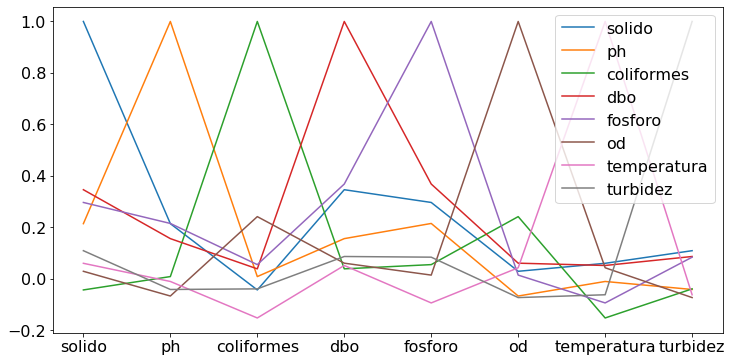

In [52]:
print("Gráfico das correlações - UGRHI10")
print("\n")
plt.rcParams["figure.figsize"] = (12,6)
df10.corr().plot()
print("Para as predições do parâmetro pH vamos considerar os coenficientes maiores de 0.50 (positivo ou negativo indica uma correlação de moderada à forte.)")
print("\n")
print("Parâmetros eleitos correlacionados a pH: PH. Para esses dados faremos a regressão univariada.")

In [53]:
df10.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,solido,ph,coliformes,dbo,fosforo,od,temperatura,turbidez
solido,1.0,0.21,-0.044,0.35,0.3,0.029,0.06,0.11
ph,0.21,1.0,0.0083,0.16,0.21,-0.067,-0.011,-0.042
coliformes,-0.044,0.0083,1.0,0.038,0.055,0.24,-0.15,-0.04
dbo,0.35,0.16,0.038,1.0,0.37,0.06,0.051,0.086
fosforo,0.3,0.21,0.055,0.37,1.0,0.014,-0.094,0.084
od,0.029,-0.067,0.24,0.06,0.014,1.0,0.043,-0.073
temperatura,0.06,-0.011,-0.15,0.051,-0.094,0.043,1.0,-0.062
turbidez,0.11,-0.042,-0.04,0.086,0.084,-0.073,-0.062,1.0


In [54]:
dfugrhi06 = pd.read_csv('cetesb_concatenado06semoutliers.csv',encoding='utf-8',sep=',')
dfugrhi10 = pd.read_csv('cetesb_concatenado10semoutliers.csv',encoding='utf-8',sep=',')

dfugrhi06['ugrhi'] = 6
dfugrhi10['ugrhi'] = 10

dfugrhi0610 = pd.concat([dfugrhi06, dfugrhi10])
dfugrhi0610

,Unnamed: 0,ph,coliformes,dbo,fosforo,od,solido,temperatura,turbidez,ugrhi
0,1978-01-31,6.415254,1.492010e+06,19.932203,0.725203,1.288983,291.305085,21.338983,62.362712,6
1,1978-02-28,6.404952,1.587547e+06,19.122792,0.706433,1.355509,290.850631,21.371426,62.670960,6
2,1978-03-31,6.393545,1.693320e+06,18.226659,0.685652,1.429162,290.347485,21.407346,63.012236,6
3,1978-04-30,6.382507,1.795681e+06,17.359433,0.665542,1.500439,289.860570,21.442106,63.342502,6
4,1978-05-31,6.371100,1.901455e+06,16.463299,0.644761,1.574092,289.357425,21.478026,63.683777,6
...,...,...,...,...,...,...,...,...,...,...
497,2019-06-30,7.136287,5.700000e+03,7.481633,0.197539,3.799184,361.506122,24.995918,28.922449,10
498,2019-07-31,7.136287,5.700000e+03,8.620408,0.195135,3.849796,345.626531,25.248980,33.730612,10
499,2019-08-31,7.206898,5.700000e+03,9.759184,0.192731,3.900408,329.746939,25.502041,38.538776,10
500,2019-09-30,7.134653,5.700000e+03,10.861224,0.190404,3.949388,314.379592,25.746939,43.191837,10
